# Range expansion shifts clonal interference patterns in evolving populations

Here we present code to run simulations and generate the figures seen in our pre-print: __Nikhil Krishnan and Jacob G. Scott. Range expansion shifts clonal interference patterns in evolving populations. bioRxiv (2019) 794867__  

## Prerequisites

In [2]:
from scipy.integrate import odeint
import numpy as np
from numpy import gradient as grad
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import SymLogNorm, LogNorm
import matplotlib.pylab as pl
import pandas as pd
import seaborn as sns
from scipy.integrate import odeint
import scipy.integrate as integrate
from diffusion_growth_funcs import*
import tqdm

##for improved readability of markdown
#import warnings
#warnings.filterwarnings('ignore')


## Box 1 Figures

### Demonstrating solutions of fisher equation over parameter space or r and D

We begin with RA Fisher's famous equation adaptation of a 1D reaction-diffusion framework to model the advance of beneficial mutants:

In [34]:
###generate standing waves solution of Fisher equation
### varying initial conditions chosen for best aesthetic result of each figure
stnd_r = odeint(standing_wave,[1,-.09],np.linspace(0,99,100),args=(1,1))[:,0]
stnd_D = odeint(standing_wave,[1,-.01],np.linspace(0,99,100),args=(1,1))[:,0]

In [35]:
### growth rates for which Fisher wave will be solved through time
rs= [1,2,3,4,5]  
r_waves = []
t = np.linspace(0,5,100) 
dt = t[1]-t[0]
t0 = 30 

##solve Fisher equation through time using standing wave as initial wave
for r in rs:
    r_waves.append(odeint(simple_fisher, stnd_r, t, args = (0,r,dt))[t0,:])

/Users/krishnn/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Text(0.5, 0, 'x')

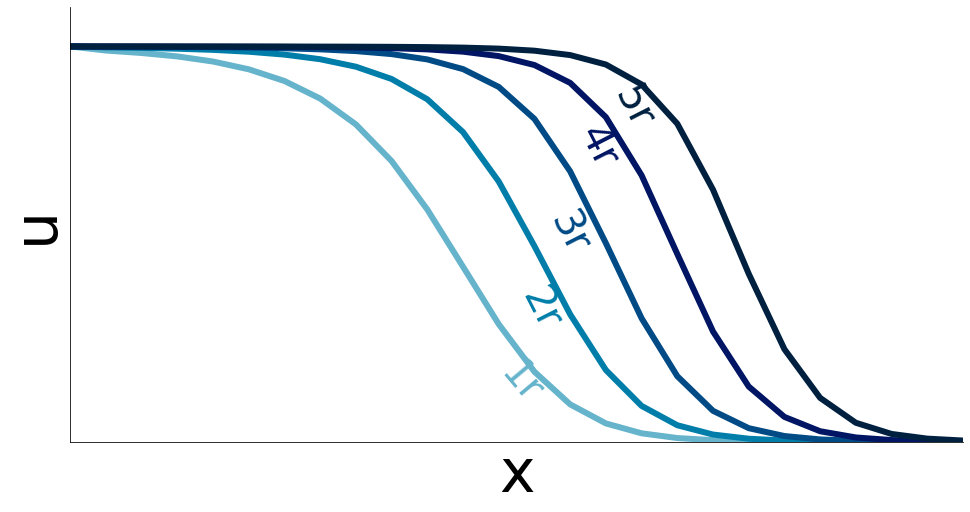

In [36]:
###Box 1 Figure (left)

##i.e. alpha = 0 
box_c = (0.968, 0.940, 0.968,0)

fig, ax  = plt.subplots(figsize=(16,8),sharey=True,facecolor=box_c)

colors = pl.cm.ocean(np.linspace(.8,.25,5))


for r in range(len(r_waves)):
    ax.plot(r_waves[r],color=colors[r],lw=6)

    
ax.set_facecolor(box_c)

##axis labels and line label font sizes
fsa=40
fsl=60

#line labels
ax.text(11.8,.1,'%.0fr' % (rs[0]) ,color=colors[0],fontsize=fsa,rotation =-50)
ax.text(12.4,.29,'%.0fr' % (rs[1]),color=colors[1],fontsize=fsa,rotation =-63)
ax.text(13.2,.48,'%.0fr' % (rs[2]),color=colors[2],fontsize=fsa,rotation =-63)
ax.text(14,.7,'%.0fr' % (rs[3]),color=colors[3],fontsize=fsa,rotation =-63)
ax.text(15,.8,'%.0fr' % (rs[4]),color=colors[4],fontsize=fsa,rotation =-63)

ax.set_ylim(0,1.1)   
ax.set_xlim(0,25)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('u',fontsize=fsl)
ax.set_xlabel('x',fontsize=fsl)



#plt.savefig('fisher_r.pdf',facecolor=fig.get_facecolor(), edgecolor='none')

In [37]:
### Diffusion constant  for which Fisher wave will be solved through time
Ds= [.01,.05,.09,.13,.17]
D_waves = []
t = np.linspace(0,5,100)
dt = t[1]-t[0]
t0 = 20

##solve Fisher equation through time using standing wave as initial wave
for D in Ds:
    D_waves.append(odeint(simple_fisher, stnd_D, t, args = (D,5,dt))[t0,:])

/Users/krishnn/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(10, 60)

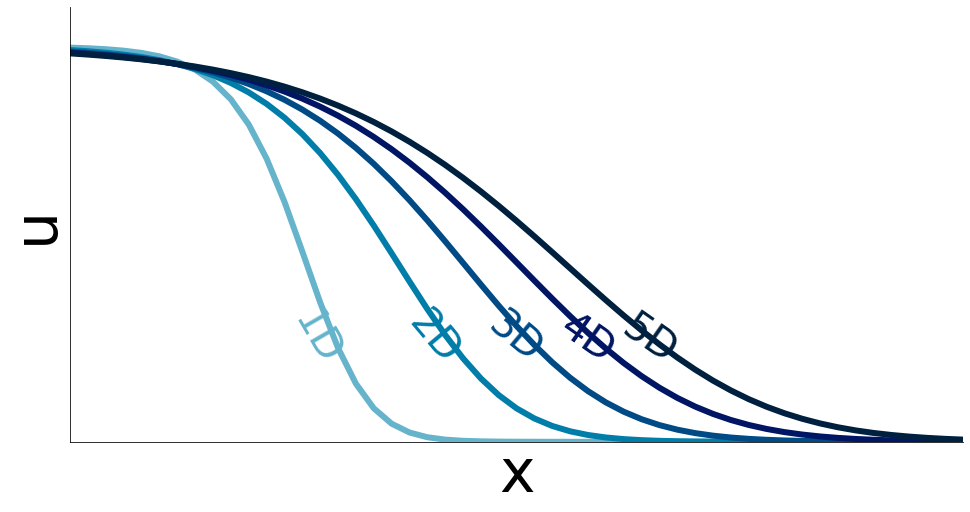

In [38]:
###Box 1 Figure (right)

##i.e. alpha = 0 
box_c = (0.968, 0.940, 0.968,0)

fig, ax  = plt.subplots(figsize=(16,8),sharey=True,facecolor=box_c)
colors = pl.cm.ocean(np.linspace(.8,.25,5))


for D in range(len(D_waves)):
    ax.plot(D_waves[D],color=colors[D],lw=6)
    
ax.set_facecolor(box_c)

##axis labels and line label font sizes
fsa=40
fsl=60

#line labels
ax.text(22,.2,'%.0fD' % (1) ,color=colors[0],fontsize=fsa,rotation=-60)
ax.text(28.5,.2,'%.0fD' % (2),color=colors[1],fontsize=fsa,rotation=-50)
ax.text(33,.2,'%.0fD' % (3),color=colors[2],fontsize=fsa,rotation=-40)
ax.text(37,.2,'%.0fD' % (4),color=colors[3],fontsize=fsa,rotation=-35)
ax.text(40.5,.2,'%.0fD' % (5),color=colors[4],fontsize=fsa,rotation=-35)

ax.set_ylim(0,1.1)   
ax.set_xticks([])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('u',fontsize=fsl)
ax.set_xlabel('x',fontsize=fsl)
ax.set_xlim(10,60)

#plt.savefig('fisher_D.pdf',facecolor=fig.get_facecolor(), edgecolor='none')

## Box 2 Figures

### Clonal interference with varying mutation-selection in a well mixed model

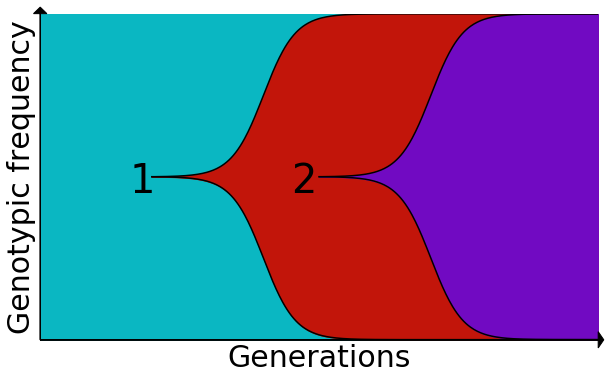

In [39]:
##Box 2 Figure (left)

fig, ax = plt.subplots(figsize=(10,6),facecolor=box_c)

##assign colors
wt= [sns.hls_palette(8, l=.4, s=.9)[4]]
mut = [sns.hls_palette(8, l=.4, s=.9)[0]]
mut1 = [sns.hls_palette(8, l=.4, s=.9)[-2]]


##clone 0
ax.fill_between(np.linspace(0,500,500),.5,-.5,color = wt)

##clone 1
clone = (.5/(1+np.exp(-.07*np.linspace(0,400,400)+7))) - .5/(1+np.exp(7))
clone_ = -clone
ax.plot(np.linspace(100,500,400),clone,'k')
ax.plot(np.linspace(100,500,400),clone_,'k')
ax.fill_between(np.linspace(100,500,400),clone,clone_,color = mut) ##fill boundaries for first mutant 

##clone 2 
clone2 = (.5/(1+np.exp(-.07*np.linspace(0,250,250)+7))) - .5/(1+np.exp(7))
clone2_ = -clone2
ax.fill_between(np.linspace(250,500,250),clone2,clone2_,color = mut1) ##fill boundaries for second mutant 
ax.plot(np.linspace(250,500,250),clone2,'k')
ax.plot(np.linspace(250,500,250),clone2_,'k')

##adjust plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-.5,.5)
ax.set_xlim(0,500)
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('Genotypic frequency',fontsize=30)
ax.set_xlabel('Generations',fontsize=30)
ax.text(80,-.05,'1',fontsize=40)
ax.text(225,-.05,'2',fontsize=40)

##add arrows on axes
ax.arrow(0,-.5,500,0,head_width =.05,head_length= 5,clip_on=False,color = 'k')
ax.arrow(0,-.5,0,1,head_width =12,head_length= .02,clip_on=False,color = 'k')

#plt.savefig('SSWM.pdf', facecolor=fig.get_facecolor(), edgecolor='none'  )

Text(0.5, 0, 'Generations')

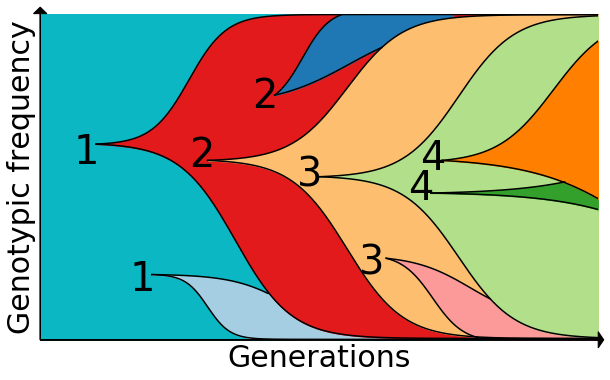

In [40]:
##Box 2 Figure (left)

fig, ax = plt.subplots(figsize=(10,6),facecolor=box_c)

##mutant colors 
pal = sns.color_palette("Paired",10) ##mutant colors
ls = 40 ##line label font size 


#clone 0
ax.fill_between(np.linspace(0,500,500),.5,-.5,color = wt)


#clone 1b
clone1b = -((.2/(1+np.exp(-.04*np.linspace(0,400,400)+5))) - (.2/(1+np.exp(5)))+.3)
clone1b_ = -((.2/(1+np.exp(-.1*np.linspace(0,400,400)+5))) - (.2/(1+np.exp(5)))+.3)
ax.fill_between(np.linspace(100,500,400),clone1b,clone1b_,color = [pal[0]])
ax.plot(np.linspace(100,204,104),clone1b[0:104],'k')
ax.plot(np.linspace(100,500,400),clone1b_,'k')
ax.text(80,-.35,'1',fontsize=ls) ##label 

#clone 1a
clone1a = (.4/(1+np.exp(-.06*np.linspace(0,450,450)+5))) - .4/(1+np.exp(5)) +.1
clone1a_ = -((.6/(1+np.exp(-.04*np.linspace(0,450,450)+5))) - .6/(1+np.exp(5)) -.1)
ax.fill_between(np.linspace(50,500,450),clone1a,clone1a_,color = [pal[5]])
ax.plot(np.linspace(50,500,450),clone1a,'k')
ax.plot(np.linspace(50,500,450),clone1a_,'k')
ax.text(30,.04,'1',fontsize=ls) ##label


#clone 2b
clone2b = (.30/(1+np.exp(-.08*np.linspace(0,160,160)+2))) - (.30/(1+np.exp(2)))+.25
clone2b_ =(.25/(1+np.exp(-.03*np.linspace(0,160,160)+2))) - (.25/(1+np.exp(2)))+.25
ax.fill_between(np.linspace(210,370,160),clone2b_,clone2b,color = [pal[1]])
ax.plot(np.linspace(210,370,160),clone2b,'k')
ax.plot(np.linspace(210,306,96),clone2b_[0:96],'k')
ax.text(190,.21,'2',fontsize=ls) ##label 

#clone 2a
clone2a = (.45/(1+np.exp(-.04*np.linspace(0,350,350)+5))) - .45/(1+np.exp(5)) +.05
clone2a_ = -((.55/(1+np.exp(-.04*np.linspace(0,350,350)+5))) - .55/(1+np.exp(5)) -.05)
ax.fill_between(np.linspace(150,500,350),clone2a,clone2a_,color = [pal[6]])
ax.plot(np.linspace(150,500,350),clone2a,'k')
ax.plot(np.linspace(150,500,350),clone2a_,'k')
ax.text(133,.03,'2',fontsize=ls) ##label 


#clone 3b
clone3b = - ((.27/(1+np.exp(-.07*np.linspace(0,190,190)+3))) - (.27/(1+np.exp(3)))+.25)
clone3b_ = -((.20/(1+np.exp(-.04*np.linspace(0,190,190)+3))) - (.20/(1+np.exp(3)))+.25)
ax.fill_between(np.linspace(310,500,190),clone3b,clone3b_,color =[pal[4]])
ax.plot(np.linspace(310,400,93),clone3b[0:93],'k')
ax.plot(np.linspace(310,403,93),clone3b_[0:93],'k')
ax.text(286,-.3,'3',fontsize=ls) ##label 

#clone 3a
clone3a = (.5/(1+np.exp(-.04*np.linspace(0,250,250)+5))) - .5/(1+np.exp(5))
clone3a_ = -clone3a
ax.fill_between(np.linspace(250,500,250),clone3a,clone3a_,color =[pal[2]])
ax.plot(np.linspace(250,500,250),clone3a,'k')
ax.plot(np.linspace(250,500,250),clone3a_,'k')
ax.text(230,-.03,'3',fontsize=ls) ##label 

#clone 4a
clone4a = (.55/(1+np.exp(-.02*np.linspace(0,150,150)+5))) - .55/(1+np.exp(5)) -.05
clone4a_ = -((.45/(1+np.exp(-.02*np.linspace(0,150,150)+5))) - .45/(1+np.exp(5)) +.05)
ax.fill_between(np.linspace(350,500,150),clone4a,clone4a_,color =[pal[3]])
ax.plot(np.linspace(350,470,120),clone4a[0:120],'k')
ax.plot(np.linspace(350,500,150),clone4a_,'k')
ax.text(340,.02,'4',fontsize=ls) ##label 

#clone 4b
clone4b = (.45/(1+np.exp(-.04*np.linspace(0,150,150)+4))) - .45/(1+np.exp(4)) +.05
clone4b_ = -((.55/(1+np.exp(-.02*np.linspace(0,150,150)+4))) - .55/(1+np.exp(4)) -.05)
ax.fill_between(np.linspace(360,510,150),clone4b,clone4b_,color =[pal[7]])
ax.plot(np.linspace(360,510,150),clone4b,'k')
ax.plot(np.linspace(360,510,150),clone4b_,'k')
ax.text(330,-.07,'4',fontsize=ls) ##label 


ax.plot()


##adjust plot 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-.5,.5)
ax.set_xlim(0,500)
ax.set_yticks([])
##ax.set_yticklabels([1])
ax.set_xticks([])
ax.arrow(0,-.5,500,0,head_width =.05,head_length= 5,clip_on=False,color = 'k')
ax.arrow(0,-.5,0,1,head_width =12,head_length= .02,clip_on=False,color = 'k')
ax.set_ylabel('Genotypic frequency',fontsize=30)
ax.set_xlabel('Generations',fontsize=30)



#plt.savefig('clonal_interference.pdf', facecolor=fig.get_facecolor(), edgecolor='none')

## Figure 1 

### Stochastic Fisher wave with a beneficial mutant 

In [41]:
def standing_wave(y0,x,D,rw):
    u = y0[0]
    z = y0[1]
    dudx = z
    dzdx =(-2*((rw*D)**.5)*dudx -u*rw*(1-u))/D
    return [dudx,dzdx]

In [42]:
%%latex
\begin{equation}
    0 = D\partial^2_xb_i + b_0 r_w (1 - b_0) + v \partial_x b_0,
    \label{eq:4}
\end{equation}
\begin{align}
    &\partial_t b_w = D\partial^2_xb_w+ r_w b_w \big(1-(b_m+b_w))\big) + \sqrt{\frac{2b_w(1-(b_m+b_w))}{K}}\eta(t)-u_bb_w 
    \label{eq:2}
    \\\mathrm{and }\\
    &\partial_t b_m = D\partial^2_xb_m+ r_m b_m \big(1-(b_m+b_w))\big) + \sqrt{\frac{2b_m(1-(b_m+b_w))}{K}}+u_bb_m
     \label{eq:3}
\end{align}

<IPython.core.display.Latex object>

We begin by generating a solution to the Fisher wave, in the co-moving frame (above). We will use this to initiallize are simulations

Text(0, 0.5, '$b_{0}(x)$')

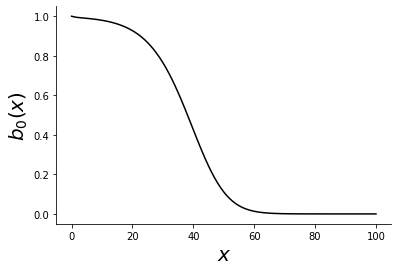

In [43]:
x_init=100
x = np.linspace(0,x_init-1,x_init)
r = .1
b0= 1 
db0 = -.005
stand = odeint(standing_wave,[b0,db0],x,args=(1,r))[:,0]

fig,ax=plt.subplots()
ax.plot(stand,'k')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('$x$',fontsize=20)
ax.set_ylabel('$b_{0}(x)$',fontsize=20)

In [44]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0),},font_scale=1)

In [ ]:
%%latex

In [412]:
def sFisher_1max(b,dx,mu,s,r,K,D):
    np.random.seed(13)
    dbdt=[]
    ## chane in mutation from previous allele to current allel, beings at 0
    dbmu_ = 0
    ## iterate through each allele "i"
    for i in range(len(b)):
        bi = b[i]
        btot = np.sum(b,axis=0) #total population density w.r.t. x 
        dbidt = D*grad(grad(bi,dx),dx) + (r+s*i) * bi*(1-btot) +(((2*bi*[max(0,j) for j in (1-btot)])/K)**.5) * np.random.normal(0,1,len(bi))
        dbmudt = b[0]*mu* (2*(i==1)-1)
        dbdt.append(dbidt+dbmudt)##change in  allale population due to diffusion, growth, genetic, drift, and mutation

    return np.array(dbdt)

def sFisher_solve_1max(t,R,dR,b,func_args):
    ##initial population density, "gaussian packet"
    dx=dR ##spatial resolution to be numerically solved
    K=func_args[-2] ##compact support, 1/K - if K*mu<1 this will prevent any mutant growth
    dt = t[1]-t[0] ## time step inferred from time vector
    hist = [] ##to record population density vectors at each time step
    hist.append(b)
    ## solve fisher equation through time
    for t_step in t:
        #solve stochastich Fisher equation for on time step
        db = sFisher_1max(b,dx,*func_args)
        ##add new alleles to b vector
        b_1 = b+dt*db  ##compute new population density per Euler-Murayama method


        b_1[:,(np.sum(b,axis=0)*K) <.00001] = 0  ##apply compact support
        b_1[b_1<0]=0  ##disallow negatives
        ##remove any hanging empty, vectors to keep it resonable size

        ##record population
        hist.append(b_1)
        b = b_1
        
    return hist


In [1]:
tmax=30
t_step =.001
t=np.linspace(0,tmax,int(tmax/t_step)+1)

R=1000
dR =1
RdR= int(R/dR)

b0= np.append(stand,np.zeros(RdR-101))
b1 = np.zeros(RdR)
b = np.array([b0,b1])

mu=.005
s=.05
r=.1
K=10**2
D=1

hist = sFisher_solve_1max(t,RdR,dR,b,func_args =[mu,s,r,K,D])
hist=np.array(hist)

NameError: name 'np' is not defined

In [2730]:
t_samp = np.array([0,10,20,30])/t_step
x_space=np.linspace(0,R-1,(R-1)/dR +1)
df=pd.DataFrame()
columns=['t','x']
columns.append('b'+str())
for t in t_samp.astype(int):
    for x in x_space.astype(int):
        row=[int(t*t_step),x]
        columns=['t','x']
        for i in range(len(hist[-1])):
            row.append(np.sum(hist[t,i:,x]))
            columns.append('b'+str(i))
        
        df=df.append(pd.DataFrame(row,index=columns).T,
                  ignore_index=True)


/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [2731]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0),},font_scale=1)

In [2732]:
df['t']=df['t'].astype(int)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Text(0.5,86.72,'$X$')

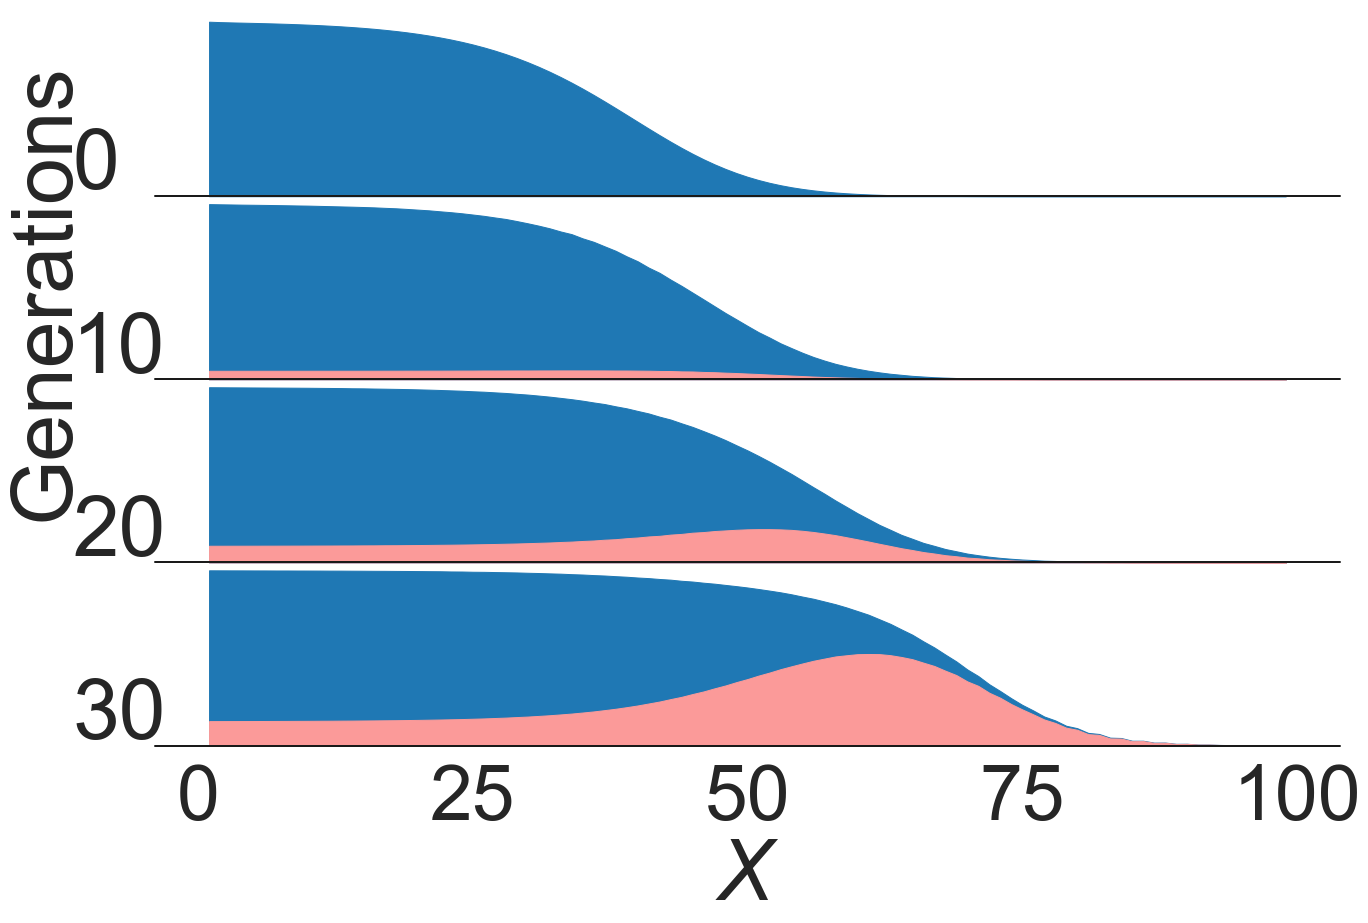

In [2734]:
## Figure 1a
##code adapted from :  https://seaborn.pydata.org/examples/kde_ridgeplot.html
##restrict to space of inserest (in lieu of  plt.xlim function)
xmax = np.where(np.sum(hist[-1][:],axis=0)*K<1)[0][0]*1.1
df= df[df['x']<100][df['x']>0]


sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0),},font_scale=7)

# Initialize the FacetGrid objects
pal = sns.color_palette("Paired",10)
g = sns.FacetGrid(df, row="t",hue= "t" ,aspect=5, height=4 )

#plot data 
g.map(plt.fill_between,"x","b0",clip_on=False,color = pal[1], label = 'Wild-type')
g.map(plt.fill_between,"x","b1",clip_on=False,color = pal[4], label = 'Mutant')
g.map(plt.axhline,y=0,lw=2,clip_on=False,color='k')


# Define and use a simple function to label the plot in axes coordinates
def label(x,color,label):
    ax = plt.gca()
    ax.text(-.07, .2, int(label),
            ha="left", va="center", transform=ax.transAxes)


#adjust plot 
g.map(label,'t')
g.fig.subplots_adjust(hspace=-.05)
g.set_titles("")
g.set(yticks=[])
g.set_ylabels("")
g.despine(bottom=True, left=True)
ax = g.facet_axis(-3,0)
ax.set_ylabel('Generations', labelpad=70)
ax = g.facet_axis(-1,0)
ax.set_xlabel('$X$')
#g.savefig('diff_rep.pdf')

In [46]:
def surf_prob(y0,x,rw,rm,D,bfunc):
    u = y0[0]
    z = y0[1]
    dudx = z
    dzdx =(-(2*((D*rw)**.5))*dudx+ u*(rm)*(1-bfunc(x))-u**2)/D
    return [dudx,dzdx]


def surf_prob_solve(b,rw,rm,D, du0 ):
    bfunc = interp1d(range(len(b)),b, bounds_error=False, fill_value="extrapolate")
    x = np.linspace(0,len(b)-1,len(b))
    s =odeint(surf_prob,[0,du0],x,args = (rw,rm,D,bfunc))
    return s

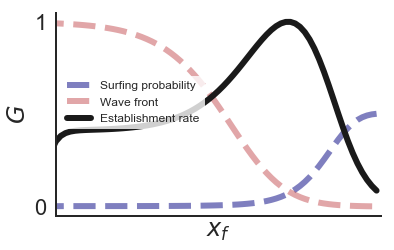

In [19]:

fig, ax1 = plt.subplots(figsize=(6,4))
sns.set(font_scale=2)
sns.set_style("white")
ax1.set_xticks([])
ax1.set_yticks([0,1])
ax1.set_yticklabels([0,r'1'])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
K=1000

#ax2.set_ylabel('$b$',color ='r')
D=1
r=.1
s=.1
stand = odeint(standing_wave,[b0,db0],x,args=(D,r))[:,0]

L_f = np.where(stand*K<1)[0][0]
rm=r+s
L = 2*3.141 /( 2*((D*(rm))**.5) * (2*(rm/r -1))**.5)
dudx = rm*((D*(rm))**.5)*np.exp(-L)


p_surf = surf_prob_solve(stand[0:L_f],r,rm,D, dudx)

ax1.set_xlabel('$x_f$')
ax1.set_ylabel(r'$G$')

ax1.set_xlim(3,L_f)

ax1.plot(p_surf[:,0][:L_f]/rm*.5,lw=6,label = 'Surfing probability',color= 'navy',linestyle='--',alpha=.5)
ax1.plot(stand[:L_f],linestyle='--',lw =6, label = 'Wave front',alpha= .5,color = 'r')
fix_count = p_surf[:,0][:L_f]*stand[:L_f]
ax1.plot((fix_count)/max(fix_count),lw=6,label = 'Establishment rate',color= 'k')
leg = ax1.legend(loc=3, prop={'size': 12},bbox_to_anchor=(0, .4))
leg.get_frame().set_edgecolor((1,1,1,0))
leg.get_frame().set_linewidth(0)
plt.tight_layout()
#plt.savefig('est_rate.pdf')

In [ ]:
mu_range =1/(10**np.array([5,4,3]))
s_range = [.05,.1,.15,.2]
K_range=10**np.array( [2,3,4])
D_range=[1]
params = [mu_range,s_range,K_range,D_range]

data_exp= []

for mu in mu_range:
    for s in s_range:
        for K in K_range:
            for D in D_range:
    
                x = np.linspace(0,100,101)
                r = .1
                b0= 1 
                db0 = -.005
                stand = odeint(standing_wave,[b0,db0],x,args=(D,r))[:,0]

                L_f = np.where(stand*K<1)[0][0]



                dt = .001
                R=1000
                dR =1
                RdR= int(R/dR)

                b0= np.append(stand,np.zeros(RdR-101))
                b1 = np.zeros(RdR)
                b = np.array([b0,b1])

                dx=dR ##spatial resolution to be numerically solvedequation through time
                t=0
                fb_1 =np.zeros(L_f)==1
                eb_1 =np.zeros(L_f)==1
                fix_times=[]
                est_times=[]
                fixed = False
                while not fixed:
                    #solve stochastich Fisher equation for on time step
                    db = sFisher_1max(b,dx,mu,s,r,K,D)
                    ##add new alleles to b vector
                    b_1 = b+dt*db  ##compute new population density per Euler-Murayama method
                    b_1[:,(np.sum(b_1,axis=0)*K) <.0001] = 0 
                    b_1[b_1<0] = 0  ##apply compact support
                    ##remove any hanging empty, vectors to keep it resonable size
                    ##record population
                    b = b_1

                    ### position where total population density goes to 0, or the "front end"
                    btot = np.sum(b,axis=0)
                    f_end = max(np.where(btot*K<1)[0][0],L_f)


                    

                    ##check where the wild type wave is exteinct along the front
                    front_bools = np.array((b[0][f_end-L_f:f_end]*K)<1)
                    est_bools = np.array((b[1][f_end-L_f:f_end]*K)>1)
                    fix_bools=front_bools*est_bools
                    ##record the time of any new fixations
                    fix_times.append((fb_1^fix_bools)*t)
                    fb_1 = front_bools
                    fixed = all(front_bools)
                    
                    ##check where the wild type wave is extinct along the front
                    est_bools = (b[1][f_end-L_f:f_end]*K)>1
                    est_times.append((eb_1^est_bools)*t)
                    eb_1 = est_bools
                    t+=1


                data_exp.append([np.array(fix_times)[:,:].max(axis=0)*dt,
                               np.array(est_times)[:,:].max(axis=0)*dt])

In [ ]:
np.save('data_exp.npy', np.array(data_exp))

In [377]:
mu_range =1/(10**np.array([3,2]))
s_range = [.1,.3]
K_range=10**np.array( [3,4])
D_range=[1]
params = [mu_range,s_range,K_range,D_range]


data_calc= []

for mu in mu_range:
    for s in s_range:
        for K in K_range:
            for D in D_range:
                x = np.linspace(0,100,101)
                r = .1
                b0= 1 
                db0 = -.005
                stand = odeint(standing_wave,[b0,db0],x,args=(D,r))[:,0]


                L_f = np.where(stand*K<1)[0][0]

                rm=r+s
                L = 2*3.141 /( 2*((D*(rm))**.5) * (2*(rm/r -1))**.5)
                dudx = rm*((D*(rm))**.5)*np.exp(-L)


                p_surf = surf_prob_solve(stand,r,rm,D, dudx)
                est_time_x =1/(stand[:L_f]*K*mu)
                R = np.max(p_surf[:,0])*np.mean(stand)*K*mu
                est_time=1/R
                fix_count = p_surf[:,0][:L_f]*stand[:L_f]*K*mu
                x_max = np.where(fix_count == max(fix_count))[0][0]


                calc_fix_times=[]
                for i in range(L_f):
                    ft = (((L_f-i)+(L_f-x_max))/ ( 2*((D*(s+r))**.5)-2*((D*(r))**.5) ))  +est_time/r
                
                    calc_fix_times.append(ft/2)
                data_calc.append([np.array(calc_fix_times),est_time_x])

    
    

In [378]:
data_exp = np.array(data_exp).reshape(2,2,2,2)

In [379]:
data_calc = np.array(data_calc).reshape(2,2,2,2)

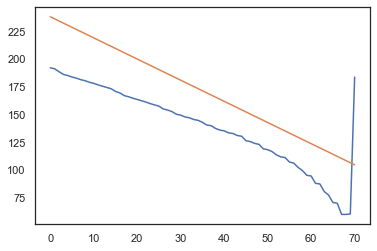

In [411]:
plt.plot(data_exp[0,0,0,0])
plt.plot(data_calc[0,0,0,0])

/Users/krishnn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


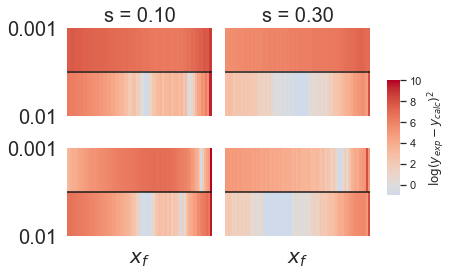

In [395]:
fig,ax= plt.subplots(2,2)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
go=3
go_count=0
for k in [0,1]:
    for i in [0,1]:
        dat= []
        for j in [0,1]:
            dat.append(np.log((data_calc[j,k,i,0]-data_exp[j,k,i,0])**2))
        im = sns.heatmap(dat,ax=ax[i,k],cmap='coolwarm',vmin=-1,vmax=10,cbar=go==go_count,
                         cbar_ax=None if go!=go_count else cbar_ax,center=0)
        #im = ax[i,k].imshow(dat,cmap='coolwarm',vmin=-10,vmax=10,aspect='auto','w')
        ax[i,k].set_yticklabels([])
        ax[i,k].set_xticklabels([])
        ax[i,k].hlines([0, 1],*ax[i,k].get_xlim())
        go_count+=1
for i in [0,1]:
    ax[-1,i].set_xlabel('$x_f$',fontsize=20)
    ax[i,0].set_yticks([.5,1.5])
    ax[i,0].set_yticklabels(mu_range,rotation=0,fontsize=20)
    ax[0,i].set_title('s = %.2f' % s_range[i],fontsize=20)
    ax[i,0].set_ylabel('$U_b$')
cbar_ax.set_ylabel('$\log (y_{exp}-y_{calc})^2$')
fig.tight_layout(rect=[0, 0, .9, 1])

In [337]:
s_range[i]

0.1

/Users/krishnn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/krishnn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


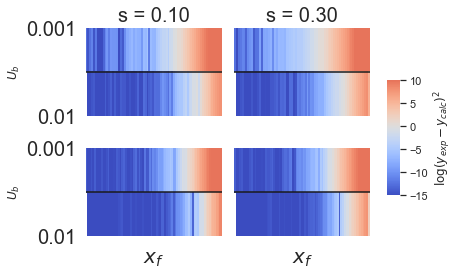

In [405]:
fig,ax= plt.subplots(2,2)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
go=3
go_count=0
for k in [0,1]:
    for i in [0,1]:
        dat= []
        for j in [0,1]:
            dat.append(np.log((data_calc[j,k,i,1]-data_exp[j,k,i,1])**2))
        im = sns.heatmap(dat,ax=ax[i,k],cmap='coolwarm',vmin=-15,vmax=10,cbar=go==go_count,
                         cbar_ax=None if go!=go_count else cbar_ax,center=0)
        #im = ax[i,k].imshow(dat,cmap='coolwarm',vmin=-10,vmax=10,aspect='auto','w')
        ax[i,k].set_yticklabels([])
        ax[i,k].set_xticklabels([])
        
        ax[i,k].hlines([0, 1],*ax[i,k].get_xlim())
        go_count+=1
for i in [0,1]:
    ax[-1,i].set_xlabel('$x_f$',fontsize=20)
    ax[i,0].set_yticks([.5,1.5])
    ax[i,0].set_yticklabels(mu_range,rotation=0,fontsize=20)
    ax[i,0].set_ylabel('$U_b$')
    ax[0,i].set_title('s = %.2f' % s_range[i],fontsize=20)
cbar_ax.set_ylabel('$\log (y_{exp}-y_{calc})^2$')

fig.tight_layout(rect=[0, 0, .9, 1])

/Users/krishnn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


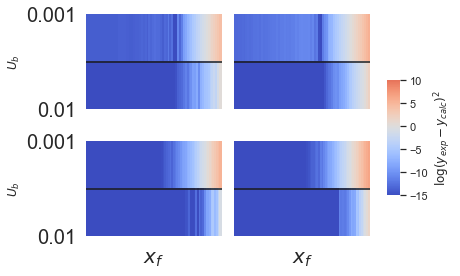

In [406]:
fig,ax= plt.subplots(2,2)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
go=3
go_count=0
for k in [0,1]:
    for i in [0,1]:
        dat= []
        for j in [0,1]:
            CII = np.log((data_calc[j,k,i,1]/data_calc[j,k,i,0]-data_exp[j,k,i,1]/data_exp[j,k,i,0])**2)
            dat.append(CII)
        im = sns.heatmap(dat,ax=ax[i,k],cmap='coolwarm',vmin=-15,vmax=10,cbar=go==go_count,
                         cbar_ax=None if go!=go_count else cbar_ax,center=0)
        #im = ax[i,k].imshow(dat,cmap='coolwarm',vmin=-10,vmax=10,aspect='auto','w')
        ax[i,k].set_yticklabels([])
        ax[i,k].set_xticklabels([])
        ax[i,k].hlines([0, 1],*ax[i,k].get_xlim())
        go_count+=1
for i in [0,1]:
    ax[-1,i].set_xlabel('$x_f$',fontsize=20)
    ax[i,0].set_yticks([.5,1.5])
    ax[i,0].set_yticklabels(mu_range,rotation=0,fontsize=20)
    ax[i,0].set_ylabel('$U_b$')
cbar_ax.set_ylabel('$\log (y_{exp}-y_{calc})^2$')
fig.tight_layout(rect=[0, 0, .9, 1])

In [247]:
mu_range =1/(10**np.array([4,3,2]))
s_range = [.1,.2,.3]
K_range=10**np.array( [2,3,4])
D_range=[1.1,1,.9]
params = [mu_range,s_range,K_range,D_range]

CIIs=[]
for a,mu in enumerate(mu_range):
    for b,s in enumerate(s_range):
        for c,K in enumerate(K_range):
            for d,D in enumerate(D_range):
                x = np.linspace(0,100,101)
                r = .1
                b0= 1 
                db0 = -.005
                stand = odeint(standing_wave,[b0,db0],x,args=(D,r))[:,0]


                L_f = np.where(stand*K<1)[0][0]

                rm=r+s
                L = 2*3.141 /( 2*((D*(rm))**.5) * (2*(rm/r -1))**.5)
                dudx = rm*((D*(rm))**.5)*np.exp(-L)


                p_surf = surf_prob_solve(stand,r,rm,D, dudx)
                est_time_x =1/(stand[:L_f]*K*mu)
                R = np.mean(p_surf[:,0])*np.mean(stand)*K*mu
                est_time=1/R
                fix_count = p_surf[:,0][:L_f]*stand[:L_f]*K*mu
                x_max = np.where(fix_count == max(fix_count))[0][0]


                calc_fix_times=[]

                for i in range(L_f):
                    ft = (((L_f-i)+(L_f-x_max))/ ( 2*((D*(s+r))**.5)-2*((D*(r))**.5) ))  +est_time/r
                    fix_time =ft/2
                CII=np.log(fix_time/est_time_x)
                CIIs.append(CII)


    
                

In [248]:

CIIs = np.array(CIIs).reshape(3,3,3,3)


In [256]:
CIIs

IndexError: index 6 is out of bounds for axis 1 with size 3

In [289]:
CIIs[:,1,0,0]

array([array([ 4.37875566,  4.3749369 ,  4.37257866,  4.37086181,  4.36937977,
        4.36792542,  4.36638711,  4.364698  ,  4.36281129,  4.36068801,
        4.35829092,  4.35558124,  4.35251685,  4.34905105,  4.34513162,
        4.34070004,  4.3356906 ,  4.33002961,  4.32363446,  4.3164127 ,
        4.30826097,  4.29906394,  4.2886932 ,  4.27700607,  4.26384443,
        4.24903357,  4.23238101,  4.21367553,  4.19268624,  4.16916195,
        4.14283084,  4.11340041,  4.08055794,  4.04397162,  4.00329239,
        3.9581563 ,  3.90818792,  3.85300465,  3.79222185,  3.72545885,
        3.65234566,  3.57253032,  3.48568643,  3.39152079,  3.28978068,
        3.18026025,  3.06280618,  2.93732148,  2.80376801,  2.66216695,
        2.51259751,  2.35519395,  2.19014098,  2.01766839,  1.83804376,
        1.65156519,  1.4585543 ,  1.2593485 ,  1.05429451,  0.8437421 ,
        0.6280384 ,  0.40752351,  0.18252682, -0.04663484]),
       array([ 4.39832018,  4.39450142,  4.39214317,  4.39042633,  4

0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2


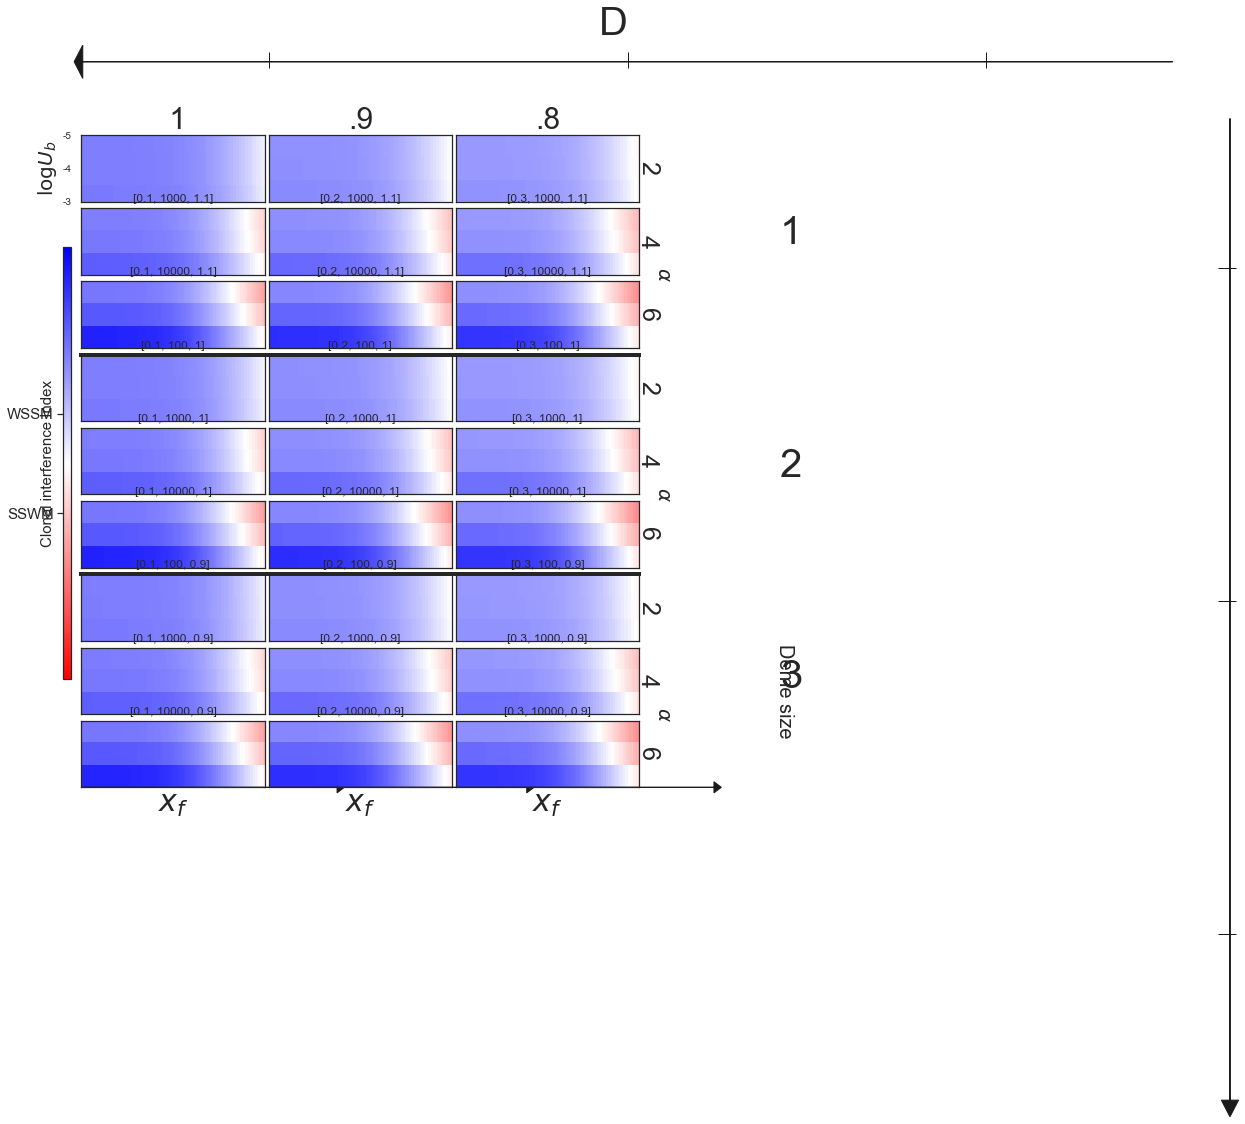

In [287]:
fig, axs = plt.subplots(9,3,figsize=(10,12))

for ax,l,j,k in zip(axs.flat,9*np.array(range(3)).tolist(),np.array([[3*[i] for i in range(3)]*3 for j in range(3)]).flatten(),np.array([[9*[i] for i in range(3)]]*3).flatten()):     
    print(j)
    m = ax.imshow(CIIs[:,l,j,k].tolist(),vmin=-10,vmax=10,cmap='bwr_r',aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title([s_range[l],K_range[j],D_range[k]])
    
    
cbar_ax = fig.add_axes([0.1, 0.25, 0.01, 0.5])
cbar = fig.colorbar(m, cax=cbar_ax,ticks= [-2.3,2.3])
cbar.set_label('Clonal interference Index', rotation=90,fontsize=15,labelpad=-30)
cbar_ax.set_yticklabels(['SSWM','WSSM'],fontsize=15)
cbar_ax.yaxis.set_ticks_position('left')

    
plt.subplots_adjust(wspace=.02)
plt.subplots_adjust(hspace=.1)



axs[0,0].set_yticks([0,1,2])
axs[0,0].set_yticklabels([-5,-4,-3],fontsize=10)
axs[0,0].set_ylabel(r'$\logU_b$',fontsize=20,rotation=90)


for i in [0,1,2]:
    axs[0+3*i,-1].set_ylabel('2',fontsize=25,labelpad=-180,rotation=270)
    axs[1+3*i,-1].set_ylabel('4',fontsize=25,labelpad=-180,rotation=270)
    axs[2+3*i,-1].set_ylabel('6',fontsize=25,labelpad=-180,rotation=270)

    axs[1+3*i,-2].set_ylabel(r'$\alpha$',fontsize=20,rotation=270,labelpad=50)
    axs[1+3*i,-2].yaxis.set_label_coords(2.1, 0)

axs[0+4*0,-1].set_ylabel('2',fontsize=25,labelpad=-180,rotation=270)

axs[0,0].text(180,-3,'D',fontsize=40)
axs[0,0].set_title(' 1',fontsize=30)
axs[0,1].set_title('.9',fontsize=30)
axs[0,2].set_title('.8',fontsize=30)


ax.text(132,-22,1,fontsize=40)
ax.text(132,-11.5,2,fontsize=40)
ax.text(132,-2,3,fontsize=40)


ax.text(130,.1,'Deme size',fontsize=20,rotation=270)

axs[0,0].arrow(400,-.5,0,29.5,head_width =6,head_length= .5,clip_on=False,color = 'k')
axs[0,0].arrow(396,4,6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(396,14,6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(396,24,6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')


axs[0,0].arrow(380,-2.2,-380,-0,head_width =1,head_length= 3,clip_on=False,color = 'k')
axs[0,0].arrow(65,-2,0,-.5,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(190,-2,0,-.5,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(315,-2,0,-.5,head_width =0,head_length= 0,clip_on=False,color = 'k')


for i in [0,1,2,]:
    axs[-1,i].set_xlabel(r'$x_{f}$',fontsize=30)
    
axs[-1,0].arrow(0,2.5,104,0,head_width=.5,head_length=3,clip_on=False,color = 'k')
axs[-1,1].arrow(0,2.5,105,0,head_width=.5,head_length=3,clip_on=False,color = 'k')
axs[-1,2].arrow(0,2.5,105,0,head_width=.5,head_length=3,clip_on=False,color = 'k')



for i in[0,1,2]:
    for j in range(np.prod(CIIs.shape[:2]))[::3][1:]:
        axs[j,i].spines['top'].set_linewidth(4)

#plt.savefig('CII_map.pdf')

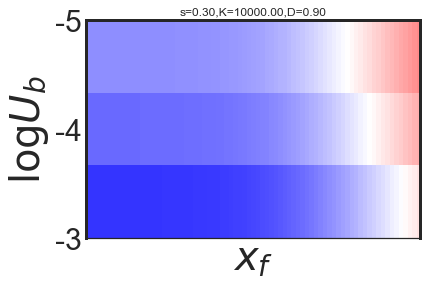

In [331]:
fig, ax = plt.subplots(figsize=(6,4))


m = ax.imshow(CIIs[:,-1,-1,-1].tolist(),vmin=-10,vmax=10,cmap='bwr_r',aspect='auto')
ax.set_xticks([])




ax.set_yticks([-.5,1,2.5])
ax.set_yticklabels([-5,-4,-3],fontsize=30)
ax.set_ylabel(r'$\logU_b$',fontsize=40)
ax.set_xlabel(r'$x_{f}$',fontsize=40)
#ax.arrow(0,2.5,124,0,head_width=.2,head_length=2,clip_on=False,color = 'k',lw=3)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_title('s=%.2f,K=%.2f,D=%.2f'%(s_range[-1],K_range[-1],D_range[-1]))
ax.spines['left'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
#plt.subplots_adjust(wspace=.05)
#plt.subplots_adjust(hspace=.1)
#plt.tight_layout()


In [2172]:
x_max

46

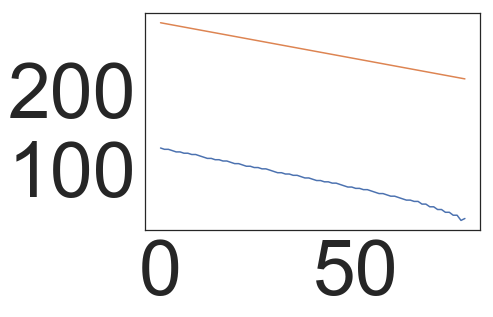

In [2205]:
plt.plot(data_exp[1])

plt.plot(data_calc[1])

In [2623]:
import statsmodels.api as sm


X=np.arange(L_f )
y = data_exp[3][:] ## X usually means our input variables (or independent variables)

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()


ValueError: endog and exog matrices are different sizes

ValueError: setting an array element with a sequence.

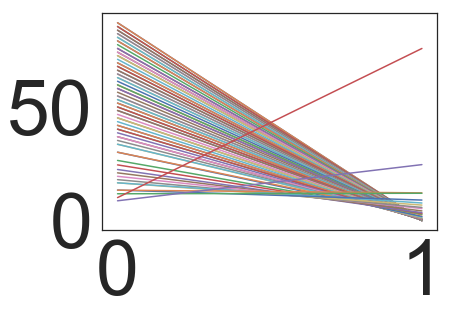

In [2621]:
plt.plot(data_exp[3])
plt.plot(data_calc[3])


In [1675]:
stand = odeint(standing_wave,[1,-.005],x,args=(D,r))[:,0]
p_surf = surf_prob_solve(stand,r,r+s,D, .028)
fix_count = p_surf[:,0][:L_f]*stand[:L_f]*K*mu
fix_count*np.arange(L_f)


array([ 0.        ,  0.20320047,  0.60697211,  1.04307168,  1.44456023,
        1.79111853,  2.08323741,  2.3293582 ,  2.53969113,  2.72358211,
        2.88869311,  3.04100459,  3.18512498,  3.32467026,  3.46260095,
        3.60149254,  3.74373532,  3.89169168,  4.04782539,  4.21479541,
        4.39556182,  4.59345804,  4.81231165,  5.05652909,  5.33120485,
        5.64226756,  5.99658273,  6.40210132,  6.8679523 ,  7.4045092 ,
        8.0233576 ,  8.73709045,  9.5588436 , 10.50138615, 11.57557945,
       12.78794733, 14.13710086, 15.60889814, 17.1704506 , 18.76381021,
       20.3010706 , 21.66393206, 22.7114942 , 23.29923309, 23.30865801,
       22.68054543, 21.43884107, 19.69223286, 17.60947837, 15.37807659,
       13.1641404 , 11.08797065,  9.2191205 ,  7.58520872,  6.18582108,
        5.00510963,  4.02050827,  3.20767358,  2.54285562,  2.00389174,
        1.57060552,  1.22497469,  0.95120293,  0.73570636,  0.5670137 ,
        0.43559989,  0.33366577])

In [1676]:
L_f - np.where(fix_count == max(fix_count))


array([[24]])

In [1606]:
L_f - np.sum((fix_count / sum(fix_count))*np.arange(L_f))

23.79345911626826

(array([48]),)

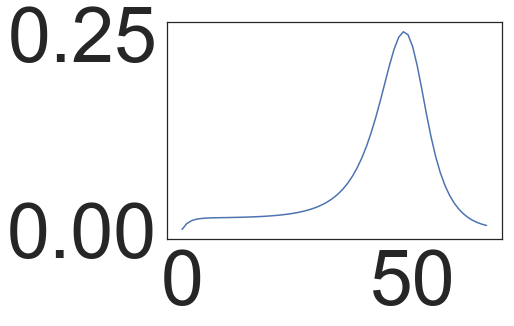

In [1461]:
plt.plot(fix_count)
np.where(fix_count==max(fix_count))

In [1537]:
L_f - np.sum((fix_count / sum(fix_count))*np.arange(L_f))

23.79345911626826

In [1688]:
calc_fix_times=[]
dist=L_f-30
for i in range(L_f):
    ft = ((L_f-i)+(24))/ ( 2*((D*(s))**.5) )
    calc_fix_times.append(ft)

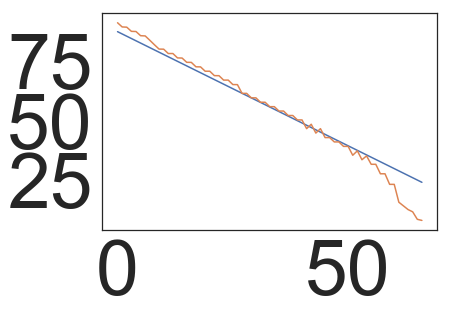

In [1689]:
plt.plot(calc_fix_times)
plt.plot(exp_fix_times)


In [1590]:
np.arange(L_f)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

In [1586]:
import statsmodels.api as sm


X=np.arange(L_f -20)
y = data[0][:-20]*t_step ## X usually means our input variables (or independent variables)

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.427e+04
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           5.84e-58
Time:                        15:43:23   Log-Likelihood:                -55.826
No. Observations:                  47   AIC:                             115.7
Df Residuals:                      45   BIC:                             119.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.9503      0.233    390.537      0.000      90.481      91.419
x1            -1.0418      0.009   -119.450      0.000      -1.059      -1.024
==============================================================================
Omnibus:                        1.608   Durbin-Watson:                   2.660
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.119
Skew:                          -0.036   Prob(JB):                        0.571
Kurtosis:                       2.247   Cond. No.                         52.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1587]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

NameError: name 'Y' is not defined

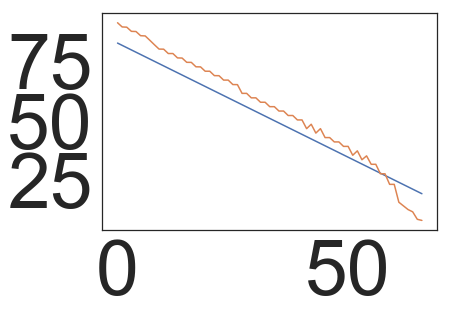

In [1591]:
plt.plot(calc_fix_times)
plt.plot(exp_fix_times)


In [1523]:
stand = odeint(standing_wave,[1,-.005],x,args=(D,r))[:,0]
p_surf = surf_prob_solve(stand,r,r+s,D, .001)
fix_count = p_surf[:,0][:L_f]*stand[:L_f]*K*mu
fix_count*np.arange(L_f)


array([0.00000000e+00, 7.27200236e-03, 2.19718735e-02, 3.86742527e-02,
       5.55080137e-02, 7.19820619e-02, 8.80934626e-02, 1.03979603e-01,
       1.19796429e-01, 1.35683799e-01, 1.51763664e-01, 1.68148291e-01,
       1.84948345e-01, 2.02281471e-01, 2.20279457e-01, 2.39095980e-01,
       2.58912429e-01, 2.79944607e-01, 3.02450973e-01, 3.26742902e-01,
       3.53198439e-01, 3.82278646e-01, 4.14544111e-01, 4.50678035e-01,
       4.91516857e-01, 5.38087130e-01, 5.91674063e-01, 6.53854956e-01,
       7.26582694e-01, 8.12284754e-01, 9.13990638e-01, 1.03547219e+00,
       1.18141179e+00, 1.35761156e+00, 1.57123256e+00, 1.83101238e+00,
       2.14747135e+00, 2.53302991e+00, 3.00190125e+00, 3.56956603e+00,
       4.25155096e+00, 5.06101461e+00, 6.00463509e+00, 7.07616268e+00,
       8.24745241e+00, 9.45792514e+00, 1.06059736e+01, 1.15494329e+01,
       1.21247889e+01, 1.21906729e+01, 1.16854128e+01, 1.06675110e+01,
       9.30535705e+00, 7.81432985e+00, 6.38075710e+00, 5.11769986e+00,
      

In [1448]:
np.where(fix_count==max(fix_count))

(array([48]),)

In [1449]:
L_f-48

19

In [1072]:
def surf_prob(y0,x,rw,rm,D,bfunc):
    u = y0[0]
    z = y0[1]
    dudx = z
    dzdx =(-(2*((D*rw)**.5))*dudx+ u*(rm)*(1-bfunc(x))-u**2)/D
    return [dudx,dzdx]


def surf_prob_solve(b,rw,rm,D, du0 ):
    bfunc = interp1d(range(len(b)),b, bounds_error=False, fill_value="extrapolate")
    x = np.linspace(0,len(b)-1,len(b))
    s =odeint(surf_prob,[0,du0],x,args = (rw,rm,D,bfunc))
    return s

[array([60489, 60489, 60489, 60489, 60489, 60489, 60489, 60489, 60489,
        60489, 60489, 60489, 60489, 60489, 60489, 60489, 60489, 60489,
        60489, 60489, 60489, 60489, 60489, 60489, 60489, 60489, 60489,
        60489, 60489, 60489, 60489, 60489, 60489, 60489, 60489, 60489,
        60489, 60489, 60489, 60489, 60489, 60489, 60489, 60489, 60489,
        60489, 60489, 60489, 60489, 60420, 60420, 60156, 60156, 59205,
        59213, 56728, 56728, 55637, 55677, 55637, 54479, 55637, 49640,
        54479, 48078, 41951, 41951])]

In [ ]:
stand = odeint(standing_wave,[b0,db0],x,args=(D,r))[:,0]
fix_count = p_surf[:,0][:L_f]*stand[:,0][:L_f]*K*mu
f_e = np.where(fix_count==max(fix_count))[0][0]

In [ ]:
fix_count

In [1017]:
x = np.linspace(0,100,101)
r = .1
b0= 1 
db0 = -.005
K =1000
stand = odeint(standing_wave,[b0,db0],x,args=(1,.1))[:,0]
stand[stand*K<1] = 0
L_f = np.where(stand==0)[0][0]
L_f

71

In [474]:
R=100
dR =1
b= [np.exp( -(np.linspace(0,R-1,R)**2)/(2**2))]

hist = sFisher_solve_1max(np.linspace(0,1,11),int(R/dR),dR,b,func_args =[.1,.01,.1,10000,1])

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less


In [482]:
def sFisher(b,dx,mu,s,r,K,D):
    dbdt=[]
    ## chane in mutation from previous allele to current allel, beings at 0
    dbmu_ = 0
    ## iterate through each allele "i"
    for i in range(len(b)):
        bi = np.array(b[i])
        btot = np.sum(b,axis=0) #total population density w.r.t. x 
        ##Stochastic fisher equation
        dbidt = D*grad(grad(bi,dx),dx) + (r+s*i) * bi*(1-btot) +(((2*bi*(1-btot))/K)**.5) * np.random.normal(0,1,len(bi))
        dbmu = -bi*mu #beneficial mutation rate, "out" of current allele
        dbdt.append(dbidt+dbmu+dbmu_)##change in  allale population due to diffusion, growth, genetic, drift, and mutation
        dbmu_ = bi*mu #"int to next allele" of current allele
    dbdt.append(dbmu_) ## mutation into next allele, for which population density vector doesnt exist yet
    return np.array(dbdt)

def sFisher_solve(t,R,dR,b,func_args):
    ##initial population density, "gaussian packet"
    b= [np.exp( -(np.linspace(0,R-1,R)**2)/(2**2))]
    dx=dR ##spatial resolution to be numerically solved
    K=func_args[-2] ##compact support, 1/K - if K*mu<1 this will prevent any mutant growth
    dt = t[1]-t[0] ## time step inferred from time vector
    hist = [] ##to record population density vectors at each time step
    hist.append(b)
    ## solve fisher equation through time
    for t_step in t:
        #solve stochastich Fisher equation for on time step
        db = sFisher(b,dx,*func_args)
        ##add new alleles to b vector
        for i in range(len(db)-len(b)):
            
            b.append(np.zeros(R))
            
        b_1 = b+dt*db  ##compute new population density per Euler-Murayama method
        b_1[(b_1*K)<1] = 0  ##apply compact support
        ##remove any hanging empty, vectors to keep it resonable size
        while  np.all(b_1[-1]==0):
            b_1 = b_1[:-1]
        ##record population
        hist.append(b_1)
        b = b_1.tolist()
        
    return hist

In [485]:
R=100
dR =1
b = b= [np.exp( -(np.linspace(0,R-1,R)**2)/(2**2))]

hist = sFisher_solve(np.linspace(0,80,8001),int(R/dR),1,b,func_args =[.001,.1,.1,1000000,1])

In [10]:
r_space= np.linspace(0,R-1,R)
t_graph = [1000,1400,1800,2200,2600] ## times to be graphed
x = []
xm = []
xm2 = []


##apppend times of interest
for t in t_graph:
    x.append(sim_sde[t][0:R]+sim_sde[t][R:2*R]) #+sim_sde[t][2*R:3*R]
    xm.append(sim_sde[t][R:2*R]) #+sim_sde[t][2*R:3*R]
    #xm2.append(sim_sde[t][2*R:3*R]) 
    

In [11]:
##iniative, space time and concentraiton arrays
r = [np.linspace(0,R-1,R).tolist()]*len(t_graph)
t=  [[t]*R for t in t_graph]
c= [[t]*R for t in t_graph]

In [12]:
##iniate dataframe 
diff_rep = {}
diff_rep['x'] = np.array(x).flatten()
diff_rep['xm'] = np.array(xm).flatten()
#diff_rep['xm2'] = np.array(xm2).flatten()
diff_rep['r'] = np.array(r).flatten()
diff_rep['t'] = np.array(t).flatten()
df = pd.DataFrame(diff_rep)

Text(0.5,86.72,'$X$')

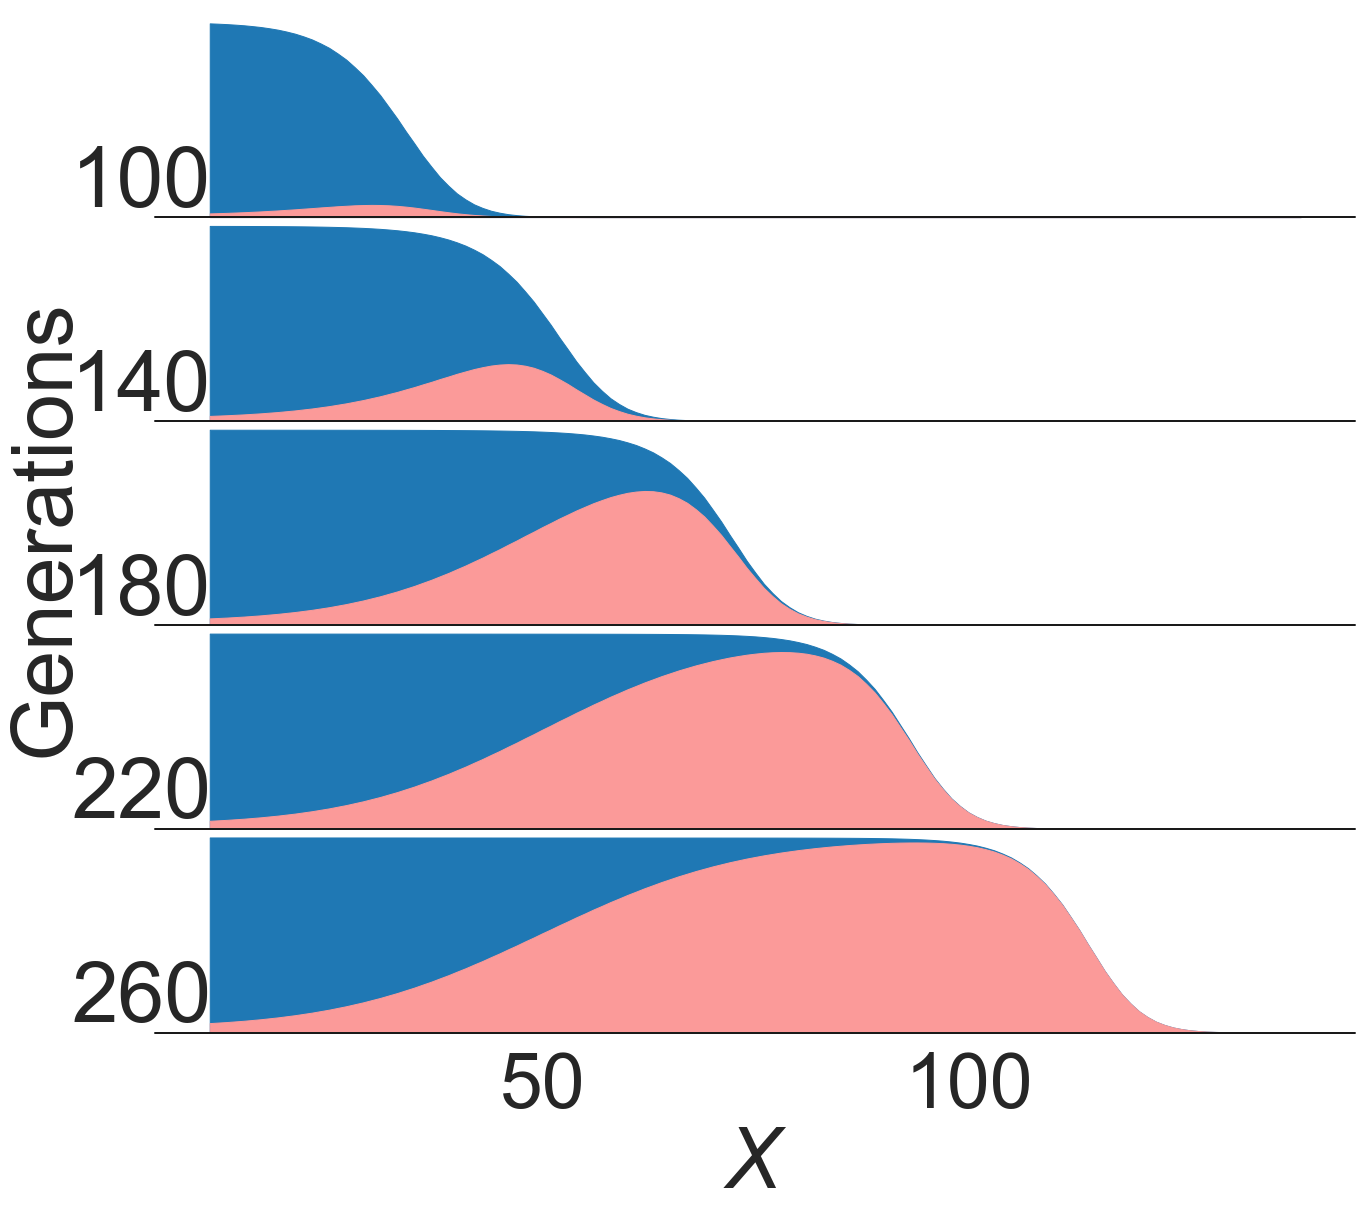

In [129]:
## Figure 1a
##code adapted from :  https://seaborn.pydata.org/examples/kde_ridgeplot.html
##restrict to space of inserest (in lieu of  plt.xlim function)
df= df[df['r']<140][df['r']>10]


sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0),},font_scale=7)

# Initialize the FacetGrid objects
pal = sns.color_palette("Paired",10)
g = sns.FacetGrid(df, row="t",hue= "t" ,aspect=5, height=4 )

#plot data 
g.map(plt.fill_between,"r","x",clip_on=False,color = pal[1], label = 'Wild-type')
g.map(plt.fill_between,"r","xm",clip_on=False,color = pal[4], label = 'Mutant')
g.map(plt.axhline,y=0,lw=2,clip_on=False,color='k')


# Define and use a simple function to label the plot in axes coordinates
def label(x,color,label):
    ax = plt.gca()
    ax.text(-.07, .2, int(int(label)/10),
            ha="left", va="center", transform=ax.transAxes)


#adjust plot 
g.map(label,'x')
g.fig.subplots_adjust(hspace=-.05)
g.set_titles("")
g.set(yticks=[])
g.set_ylabels("")
g.despine(bottom=True, left=True)
ax = g.facet_axis(-3,0)
ax.set_ylabel('Generations', labelpad=70)
ax = g.facet_axis(-1,0)
ax.set_xlabel('$X$')


#g.savefig('diff_rep.pdf')

### local mutant fixation time at wave tip over parameter space 

In [9]:
#### solve fisher equation,  measure time for front to fix with 1 mutant

###equation parameters
R= 5000
R_div = 1
c=.0028
c_0=.000035
c_1=.0028
delta= 0
I = 0
K_x = 0
K_s = 0
N = 0
H = 0
rw = .1
a = 1.3
K= (1*10**7)
b0 = np.exp( -(np.linspace(0,R-1,R)**2)/(2**2))
s0 = np.full(R,1)
t = t=np.linspace(0,100,1000)

bm0 = np.zeros((R-1)*R_div+1)
z  = np.concatenate([b0,bm0,s0])##initial conditions for wild type (gaussian packet), mutant (0), and substrate (1)


cs = [.0015,.00275,.00279,.00281] ## diffusion constants in terms of agar concentration
mus = np.array([.000001,.00001,.0001,.001]) ##mutation rates (Ub inpre print)
ss = np.array([1.5,3,4.5,6]) ## selection coefcients (alphha in preprint)
ft_param = []
results_param = []
for c in cs:
    for mu in mus:
        for a in ss:
            results = []
            results.append(z)
            dt = .1

            fixed = False
            t= 0
            fix_times=[]
            
            ##solve for standing wave which will define wave front 
            stand = odeint(standing_wave,[1,-.01],np.linspace(0,99,100),args=(M_A(c,.000035,.0028,1),rw))
            L_f = np.where((stand[:,0]*K)>1)[0][-1]
            fb_1 =np.zeros(L_f)==1
            
            
            ### run simulation until the wave front fixes 
            while not fixed:
                results.append(results[-1] +dt*model_sde_1mut(results[-1], t,R,R_div,c,c_0,c_1,delta,I,K_x,K_s,N,H,rw,a,mu,K))
                results[-1][results[-1]< 0]= 0  
                #wild type and mutant waves 
                b = results[-1][0:R] 
                bm = results[-1][R:2*R]
                
                #end of wave front
                fe= np.where(((b+bm)*K)>1)[0][-1]
                
                if fe >=L_f:
                        #start of wave front
                    fs=fe-L_f


                    front_bools = ((b[fs:fe]*K)<1)
                    ##update fixation times  times
                    fix_times.append((fb_1^front_bools)*t)
                    fb_1 = front_bools
                    fixed = all(front_bools)



                t+=1
                #limit for how long simulation would run 
                if t ==15000:
                    fixed =True
                    
                
            ft =np.array(fix_times)
            ft_param.append(ft[:,:].max(axis=0))
            results_param.append(results)

In [94]:
##arange data in arrays 
ft=np.array(ft_param).flatten()
f0 =  np.array((ss.tolist())*16).flatten()
f =  np.array([[f0[i]]*len(ft[i]) for i in range(len(ft))]).flatten()
m0 = np.array([4*[i] for i in mus]*4).flatten()
m =  np.array([[m0[i]]*len(ft[i]) for i in range(len(ft))]).flatten()
c0 = np.array([16*[i] for i in cs]).flatten()
c =  np.array([[c0[i]]*len(ft[i]) for i in range(len(ft))]).flatten()

In [95]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [96]:
#place data in dta frame
df=pd.DataFrame(dict(t = flatten(ft),f=flatten(f),m=flatten(m),c=flatten(c)))

In [97]:
##find minimum of data once normalized to the first position (x_f = 0) in the wave front for the purposes of scaling colormap 
mins = []
for f in df['f'].unique():
    for m in df['m'].unique():
        for c in df['c'].unique():
            row = df['t'][df['f'] == f][df['m'] == m][df['c'] == c]
            mins.append(row.min()/row.max())
            
min_norm = min(mins)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anacon

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anacon

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anacon

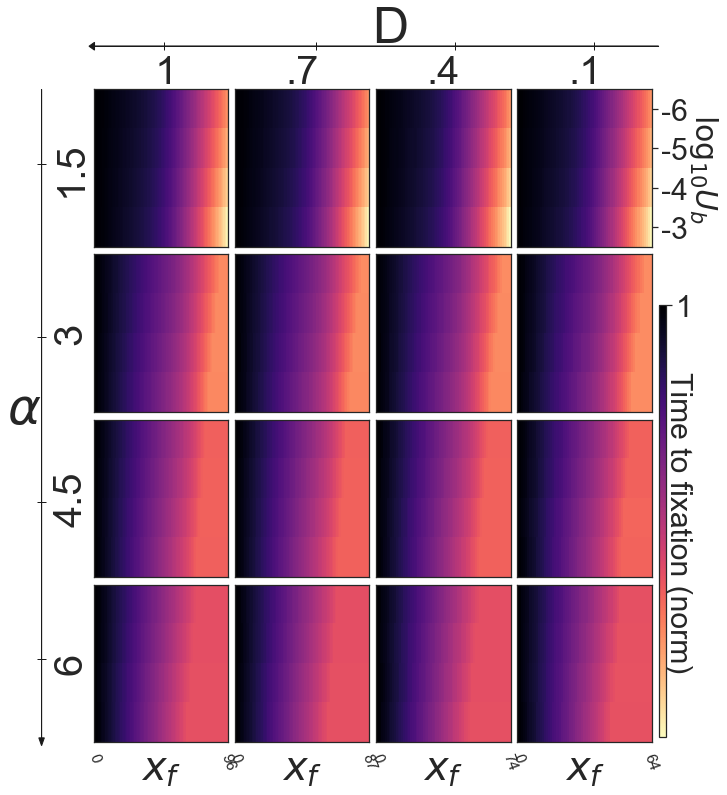

In [98]:
##Figure 1b 

fig,axs = plt.subplots(4,4,figsize =(10,12))
current_cmap = 'magma_r'
c_list = df['c'].unique().tolist()*4
f_list = np.array([4*[i] for i in df['f'].unique().tolist()]).flatten()
barc= 0 

for a,f in zip(axs, df['f'].unique()):
    for b,c in zip(range(len(a)),df['c'].unique()):
        dat= []
        for i in df['m'].unique():
            dat.append(df[df['f']==f][df['c']==c][df['m']==i]['t']/max(df[df['f']==f][df['c']==c][df['m']==i]['t']))
            a[b].imshow(dat,aspect="auto",vmin=min_norm,vmax=1,cmap=current_cmap)
        a[b].set_yticks([])
        a[b].set_xticks([])
        


plt.subplots_adjust(wspace=.05)
plt.subplots_adjust(hspace=.05)

##adjust color bar 
hm = a[b].imshow(dat,aspect="auto",vmin=min_norm,vmax=1,cmap=current_cmap)
cbar_ax = fig.add_axes([.91, 0.13, 0.01, 0.5])
cbar = fig.colorbar(hm, cax=cbar_ax,ticks=[round(min_norm,1)-.1, 1])
cbar.ax.tick_params(labelsize=30) 
cbar.set_label('Time to fixation (norm)', rotation=270,fontsize=30,labelpad=0)

###D sxis text and arrows 
axs[0,0].text(200,-1.7,'D',fontsize=50)
axs[0,0].set_title(' 1',fontsize=40)
axs[0,1].set_title('.7',fontsize=40)
axs[0,2].set_title('.4',fontsize=40)
axs[0,3].set_title('.1',fontsize=40)
axs[0,0].arrow(407,-1.60,-407,-0,head_width =.2,head_length= 4,clip_on=False,color = 'k')
axs[0,0].arrow(50,-1.5,0,-.2,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(160,-1.5,0,-.2,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(260,-1.5,0,-.2,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(360,-1.5,0,-.2,head_width =0,head_length= 0,clip_on=False,color = 'k')


## a axis text 
axs[0,0].text(-63,8,r'$\alpha$',fontsize=50)
axs[0,0].set_ylabel('1.5',fontsize=40)
axs[1,0].set_ylabel('3',fontsize=40)
axs[2,0].set_ylabel('4.5',fontsize=40)
axs[3,0].set_ylabel('6',fontsize=40)
axs[0,0].arrow(-38.2,-.5,0,16.5,head_width =4,head_length= .2,clip_on=False,color = 'k')
axs[0,0].arrow(-35.3,1.4,-6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(-35.3,5.8,-6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(-35.3,10,-6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(-35.3,14,-6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')

## U axis text 
axs[0,3].yaxis.tick_right()
axs[0,3].set_yticks([0,1,2,3])
axs[0,3].set_yticklabels([-6,-5,-4,-3],fontsize=30)
axs[0,3].set_ylabel(r'$\log_{10}U_b$',fontsize=30,rotation=270,labelpad=-170)

# bottom x tick and label axes text 
axs[-1,0].set_xticks([0,len(ft[0])-1])
axs[-1,0].set_xticklabels(['0','%d'% int(len(ft[0])-1) ],fontsize=15,rotation=290)
axs[-1,1].set_xticks([0,len(ft[17])-1])
axs[-1,1].set_xticklabels(['0','%d'% int(len(ft[17])-1) ],fontsize=15,rotation=290)
axs[-1,2].set_xticks([0,len(ft[33])-1])
axs[-1,2].set_xticklabels(['0','%d'% int(len(ft[33])-1) ],fontsize=15,rotation=290)
axs[-1,3].set_xticks([0,len(ft[49])-1])
axs[-1,3].set_xticklabels(['0','%d'% int(len(ft[49])-1) ],fontsize=15,rotation=290)
axs[-1,0].set_xlabel(r'$x_{f}$',fontsize=40,labelpad=-20)
axs[-1,1].set_xlabel(r'$x_{f}$',fontsize=40,labelpad=-20)
axs[-1,2].set_xlabel(r'$x_{f}$',fontsize=40,labelpad=-20)
axs[-1,3].set_xlabel(r'$x_{f}$',fontsize=40,labelpad=-20)


#plt.savefig('grid_norm.pdf')

### demonstrating clonal interference index w.r.t. position along wave profile 

In [3050]:
R= 500
t=np.linspace(0,1000,10000)
D=M_A(.00272,.000035,.0028,1)
K =1*10**4
a =2.5
mu = 10**-5
rw=.1
stand = odeint(standing_wave,[1,-.001],np.linspace(0,R-1,R),args=(D,rw))
p_surf = surf_prob_solve(stand[:,0],rw,rw*a,D, .001)
L_f = np.where((stand[:,0]*K)>1)[0][-1]
sim_sde_2 = sde_model_solve_2mut(R=R, R_div=1,
                          c=.00272,c_0=.000035,c_1=.0028,
                          delta= 0,I = 0,
                          K_x = 0, K_s = 0,N = .0, H = 0,rw=rw,
                          a = a,mu = mu,
                          b0 = np.exp( -(np.linspace(0,R-1,R)**2)/(2**2)),
                                 s0 = np.full(R,1),t = t,L_f=L_f, K = K )

In [3055]:
fix_count = p_surf[:,0][:L_f]*stand[:,0][:L_f]*K*mu
f_e = np.where(fix_count==max(fix_count))[0][0]
calc_est_times =1/max(fix_count)

In [3056]:
rm=rw*a
calc_fix_times = []
for i in range(L_f):
    ft = ((2*L_f-i-f_e))/ ((2*((D*rm)**.5) - 2*((D*rw)**.5)))
    calc_fix_times.append(ft)
    

In [3057]:
fix_count

array([0.00000000e+00, 7.30201718e-05, 1.10533370e-04, 1.29748378e-04,
       1.39524207e-04, 1.44428274e-04, 1.46820434e-04, 1.47920821e-04,
       1.48360614e-04, 1.48467166e-04, 1.48410165e-04, 1.48278958e-04,
       1.48120909e-04, 1.47962144e-04, 1.47817965e-04, 1.47697594e-04,
       1.47608591e-04, 1.47558162e-04, 1.47552553e-04, 1.47597515e-04,
       1.47701339e-04, 1.47871729e-04, 1.48118918e-04, 1.48453554e-04,
       1.48888156e-04, 1.49437229e-04, 1.50117152e-04, 1.50946551e-04,
       1.51946922e-04, 1.53142233e-04, 1.54559500e-04, 1.56231064e-04,
       1.58195458e-04, 1.60496249e-04, 1.63181832e-04, 1.66306429e-04,
       1.69929344e-04, 1.74124426e-04, 1.78972361e-04, 1.84565449e-04,
       1.91006521e-04, 1.98409455e-04, 2.06899822e-04, 2.16613998e-04,
       2.27704503e-04, 2.40328420e-04, 2.54645413e-04, 2.70813043e-04,
       2.88977059e-04, 3.09261597e-04, 3.31745647e-04, 3.56445830e-04,
       3.83287225e-04, 4.12074207e-04, 4.42448683e-04, 4.73853363e-04,
      

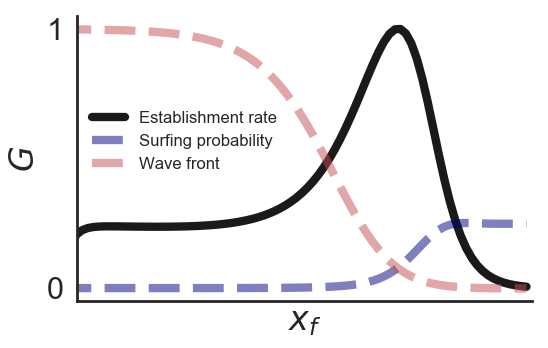

In [3061]:

fig, ax1 = plt.subplots(figsize=(6,4))
sns.set(font_scale=2)
sns.set_style("white")
ax1.set_xticks([])
ax1.set_yticks([0,1])
ax1.set_yticklabels([0,r'1'])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.set_xlim(3,L_f)

#ax2.set_ylabel('$b$',color ='r')

ax1.set_xlabel('$x_f$')
ax1.set_ylabel(r'$G$')
ax1.plot(fix_count/max(fix_count),lw=6,label = 'Establishment rate',color= 'k')

ax1.plot(p_surf[:,0][:L_f],lw=6,label = 'Surfing probability',color= 'navy',linestyle='--',alpha=.5)

ax1.plot(stand[:,0][:L_f],linestyle='--',lw =6, label = 'Wave front',alpha= .5,color = 'r')
leg = ax1.legend(loc=3, prop={'size': 12},bbox_to_anchor=(0, .4))
leg.get_frame().set_edgecolor((1,1,1,0))
leg.get_frame().set_linewidth(0)
plt.tight_layout()
plt.savefig('est_rate.pdf')

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


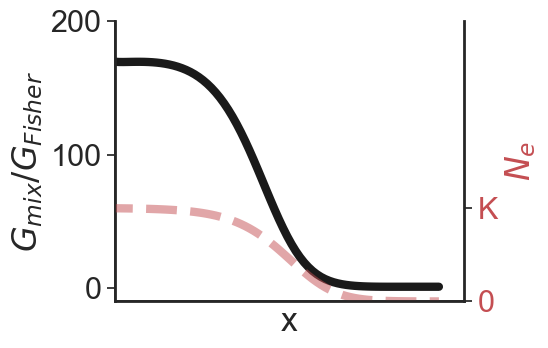

In [3064]:

fig, ax1 = plt.subplots(figsize=(6,4))
sns.set(font_scale=2)
sns.set_style("white")
ax1.set_xticks([])
#ax1.set_yticks([0,1])
#ax1.set_yticklabels([0,r'1'])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


#ax2.set_ylabel('$b$',color ='r')

ax1.set_xlabel('x')
ax1.set_ylabel(r'$G_{mix}/G_{Fisher}$')



est_rate_ratio = (np.array(stand[:,0][:L_f]*max(p_surf[:,0][:L_f])*K*mu)/np.array(fix_count))[5:L_f]

ax1.plot(est_rate_ratio,lw=6,color='k')


ax1.set_ylim(-10,200)
ax2=ax1.twinx()
ax2.plot(stand[:,0][:L_f][5:L_f]-1,linestyle='--',lw =6, label = 'Wave front',alpha= .5,color = 'r')

ax2.set_ylim(-1,2)
ax2.set_xlim(3,L_f)
ax2.set_yticks([-1,0])
ax2.set_yticklabels([0,'K'])


ax2.set_ylabel(r'$N_e$',color='r')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax2.spines['right'].set_linewidth(2)

#ax2_Set.yticks(ticks, [labels], **kwargs)
ax2.tick_params(axis='y', labelcolor='r')
#ax1.plot(stand[:,0][:L_f]/max(est_rate_ratio),linestyle='--',lw =6, label = 'Wave front',alpha= .5,color = 'r')
#leg = ax1.legend(loc=3, prop={'size': 12},bbox_to_anchor=(0, .4))
#leg.get_frame().set_edgecolor((1,1,1,0))
#leg.get_frame().set_linewidth(0)
plt.tight_layout()
plt.savefig('est_rate_ratio.pdf')

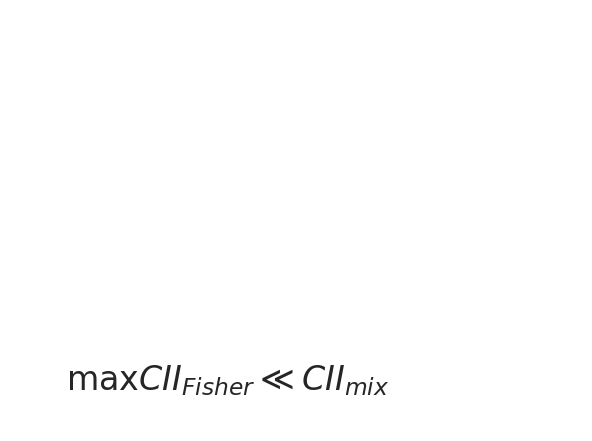

In [3065]:
fig,ax = plt.subplots()
ax.axis('off')

ax.text(0,0,r'$\maxCII_{Fisher} \ll CII_{mix}$')
plt.savefig('mix_text.pdf')

In [3066]:
s= .25-.1

fix = 1/s * np.log(sum(stand[:,0][:L_f])*s)

est = 1/ (N*mu*s)

np.log(fix/est)

6.0228993154265975

In [3067]:
fixf = (2*L_f-f_e)/ (2*((.25)**.5-(.1)**.5))

In [3068]:
fixe = 1/ (max(stand[:,0][:L_f]*p_surf[:,0][:L_f])*K*mu)

In [3069]:
np.log(fixf/fixe)

-1.684081681301772

In [3070]:
CII =np.log(calc_fix_times/calc_est_times)

In [3071]:
np.log(.01)

-4.605170185988091

In [3072]:
CII

array([-1.63565383, -1.64478631, -1.65400297, -1.66330536, -1.6726951 ,
       -1.68217384, -1.6917433 , -1.70140521, -1.71116138, -1.72101368,
       -1.73096401, -1.74101434, -1.75116672, -1.76142322, -1.771786  ,
       -1.7822573 , -1.79283941, -1.8035347 , -1.81434562, -1.82527469,
       -1.83632452, -1.84749782, -1.85879738, -1.87022608, -1.8817869 ,
       -1.89348294, -1.9053174 , -1.91729359, -1.92941495, -1.94168504,
       -1.95410756, -1.96668634, -1.97942537, -1.99232877, -2.00540085,
       -2.01864608, -2.0320691 , -2.04567475, -2.05946808, -2.07345432,
       -2.08763895, -2.10202769, -2.11662649, -2.13144158, -2.14647945,
       -2.16174692, -2.17725111, -2.19299947, -2.20899981, -2.22526033,
       -2.24178963, -2.25859675, -2.27569118, -2.29308293, -2.3107825 ,
       -2.32880101, -2.34715015, -2.36584228, -2.38489048, -2.40430856,
       -2.42411119, -2.4443139 , -2.46493318, -2.48598659, -2.5074928 ,
       -2.5294717 , -2.55194456, -2.57493408, -2.59846458, -2.62

In [3073]:
SSWM = np.where((np.log(calc_fix_times/calc_est_times)>-3))[0][-1]

In [3074]:
SSWM

81

In [3075]:
L_f

86

In [3076]:
switch = SSWM-10

In [3077]:
g_rng = L_f-switch

In [3078]:
r_space= np.linspace(0,R-1,R)
t_graph = [1500,1600,1700,1800,1900]
x = []
xm = []
xm2 = []

for t in t_graph:
    x0 = sim_sde_2[t][0:R]+sim_sde_2[t][R:2*R] +sim_sde_2[t][2*R:3*R]
    xm0 = sim_sde_2[t][R:2*R] +sim_sde_2[t][2*R:3*R]
    xm20= sim_sde_2[t][2*R:3*R]


    x.append(x0[(x0*K)>1][-g_rng:])
    xm.append(xm0[(x0*K)>1][-g_rng:])
    xm2.append(xm20[(x0*K)>1][-g_rng:])

In [3079]:
c = CII[switch:].tolist()*len(t_graph)
r = [np.linspace(0,g_rng-1,g_rng).tolist()]*len(t_graph)
t=  [[t]*g_rng for t in t_graph]

In [3080]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [3081]:
CII_rep = {}
CII_rep['x'] = flatten(np.array(x))
CII_rep['xm'] = flatten(np.array(xm))
CII_rep['xm2'] = flatten(np.array(xm2))
CII_rep['r'] = flatten(np.array(r))
CII_rep['t'] = flatten(np.array(t))
CII_rep['c'] = np.array(c)
df = pd.DataFrame(CII_rep)

In [3082]:
g_rng

15

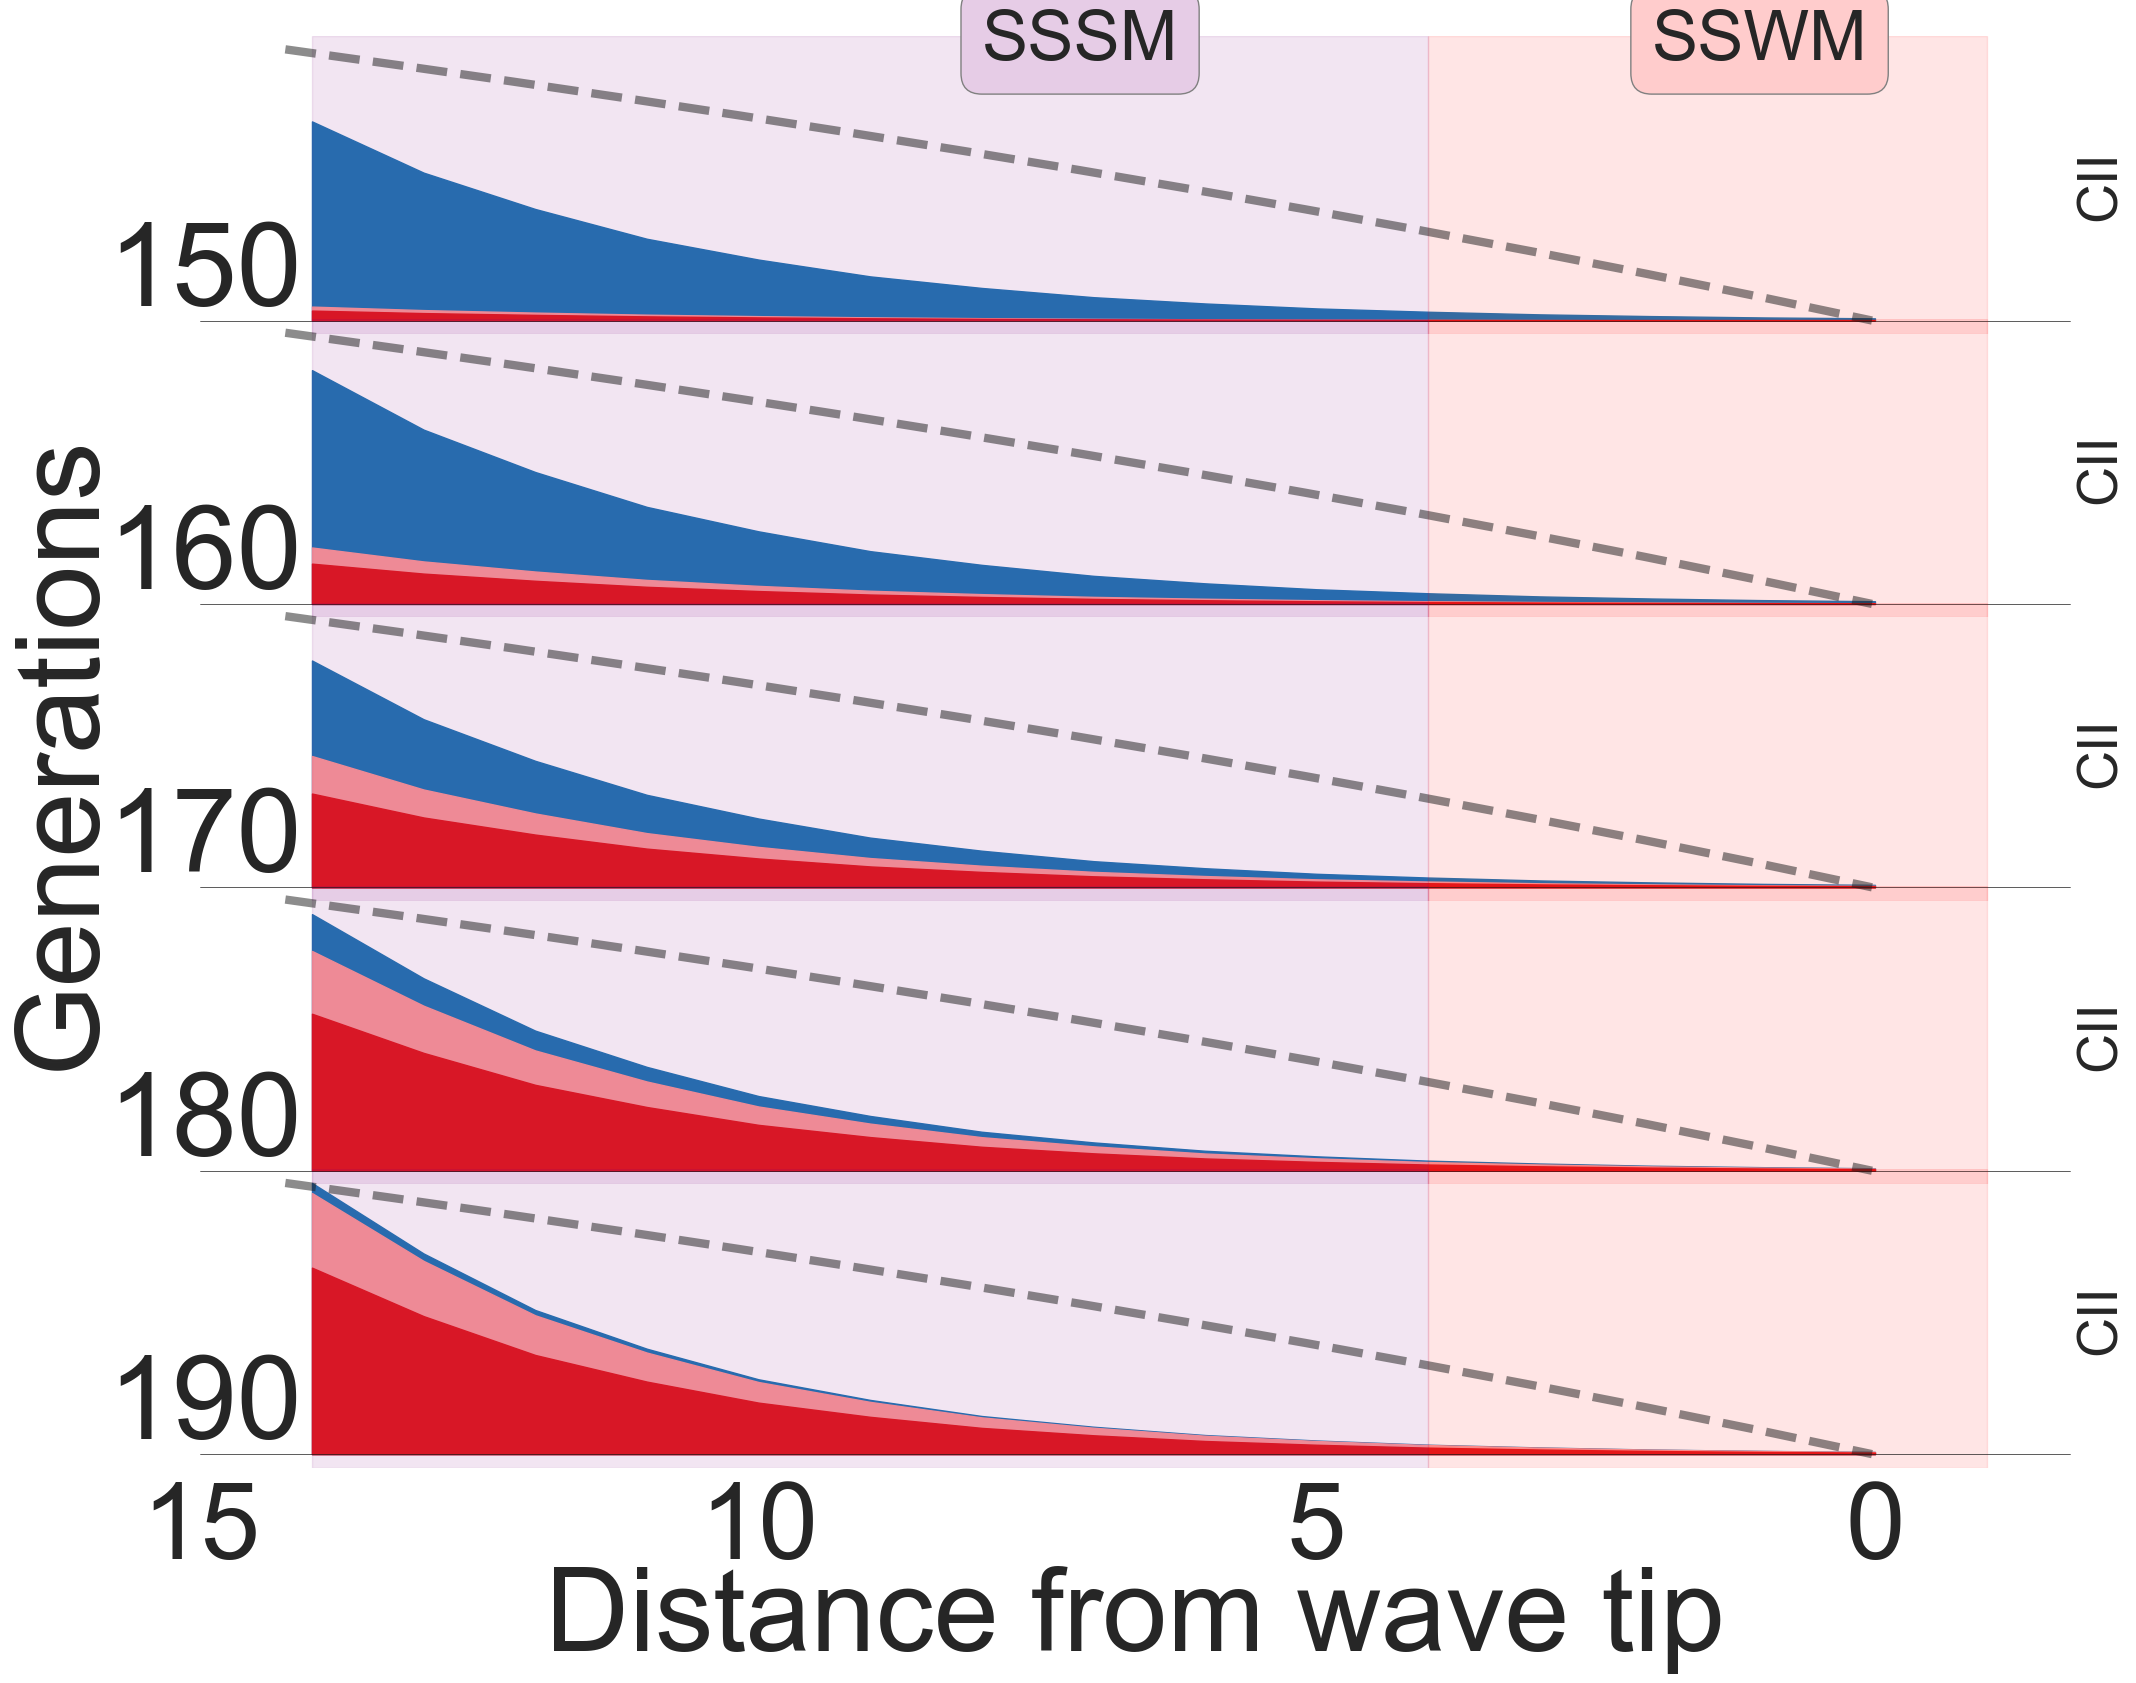

In [3105]:
#r_space[(grad(df['x'])<-.001)[0:R]]
#df = df[grad(df['x'])<-.001]


sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)},font_scale=7)

#rep CII
# Initialize the FacetGrid objects

pal = sns.color_palette("Paired",10)
g = sns.FacetGrid(df, row="t",hue= "t" ,aspect=6, height=4 )

g.map(plt.fill_between,"r","x",clip_on=False,color = pal[1], label = 'Wild-type')
g.map(plt.fill_between,"r","xm",clip_on=False,color = pal[4], label = 'Mutant')
g.map(plt.fill_between,"r","xm2",clip_on=False,color = pal[5], label = 'Mutant')


g.map(plt.axvspan,xmin=0, xmax=10, alpha=0.1, color='purple')
g.map(plt.axvspan,xmin=10, xmax=g_rng, alpha=0.1, color='red')

#g.map(plt.plot,"r","x",clip_on=False,color= 'k')
#g.map(plt.plot,"r","xm",clip_on=False,color= 'k')
#g.map(plt.fill_between,"r","xm2",clip_on=False,color = pal[9], label = 'Double Mutant')
g.map(plt.axhline,y=0,lw=.5,clip_on=False,color='k')


# Define and use a simple function to label the plot in axes coordinates
def label(x,color,label):
    ax = plt.gca()
    ax.text(-.05, .2, int(int(label)/10),
            ha="left", va="center", transform=ax.transAxes)

def facetgrid_two_axes(*args, **kwargs):
    kwargs.pop('color')
    data = kwargs.pop('data')
    dual_axis = kwargs.pop('dual_axis')
    ax = plt.gca()
    alpha = kwargs.pop('alpha', 0.5)
    if dual_axis:
        ax2 = ax.twinx()
        ax2.set_yticks([-2.3])
        ax2.set_yticklabels(['0'],fontsize=30)
        ax2.set_ylabel('CII',fontsize=40)
        #ax2.axhline(y=0,xmin=0,xmax=fe,color = 'k',alpha=.5)
        


    if dual_axis:
        ax2.plot(data['r'],data['c'],color = 'k', linewidth= 6,**kwargs,alpha=alpha,linestyle='dashed')

    
        
        
g.map_dataframe(facetgrid_two_axes, dual_axis=True)
g.map(label,'x')
#g.map(plt.xlim,xmin=10,xmax=50)
g.fig.subplots_adjust(hspace=-.05)
g.set_titles("")

g.set(yticks=[])
g.set(xticks=[-1,4,9,14])
g.set(xticklabels=[15,10,5,0])
g.set_ylabels("")

g.despine(bottom=True, left=True)


ax = g.facet_axis(-3,0)
ax.set_ylabel('Generations',labelpad=60)

ax = g.facet_axis(-1,0)
ax.set_xlabel('Distance from wave tip',labelpad=-10)
#ax.text(13,2,'CII',rotation=270)

ax = g.facet_axis(0,-1)
ax.text(12,.013, 'SSWM',fontsize=50,bbox=dict(boxstyle="round",ec='grey',fc=(1., 0.8, 0.8)))
ax.text(6,.013, 'SSSM',fontsize=50,bbox=dict(boxstyle="round",ec='grey',fc=(.9, 0.8, 0.9)))
plt.savefig('CI.pdf')

In [1769]:
R= 500
t=np.linspace(0,1000,10000)
D=M_A(.00272,.000035,.0028,1)
K =1*10**5
a =2.5
mu = 10**-4.5
rw=.1
stand = odeint(standing_wave,[1,-.000000000138],np.linspace(0,R-1,R),args=(D,rw))
p_surf = surf_prob_solve(stand[:,0],rw,rw*a,D, .001)
L_f = np.where((stand[:,0]*K)>1)[0][-1]
sim_sde_2 = sde_model_solve_2mut(R=R, R_div=1,
                          c=.00272,c_0=.000035,c_1=.0028,
                          delta= 0,I = 0,
                          K_x = 0, K_s = 0,N = .0, H = 0,rw=rw,
                          a = a,mu = mu,
                          b0 = np.exp( -(np.linspace(0,R-1,R)**2)/(2**2)),
                                 s0 = np.full(R,1),t = t,L_f=L_f, K = K )

In [1780]:
L_f

301

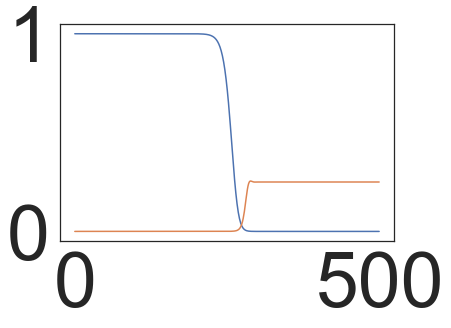

In [1770]:
stand = odeint(standing_wave,[1,-.000000000138],np.linspace(0,R-1,R),args=(D,rw))
p_surf = surf_prob_solve(stand[:,0],rw,rw*a,D, .0001)

plt.plot(stand[:,0])
plt.plot(p_surf[:,0])

In [1771]:
fix_count = p_surf[:,0][:L_f]*stand[:,0][:L_f]*K*mu
f_e = np.where(fix_count==max(fix_count))[0][0]
calc_est_times =1/max(fix_count)

In [1772]:
rm=rw*a
calc_fix_times = []
for i in range(L_f):
    ft = ((2*L_f-i-f_e))/ ((2*((D*rm)**.5) - 2*((D*rw)**.5)))
    calc_fix_times.append(ft)
    

In [1773]:
CII =np.log(calc_fix_times/calc_est_times)

In [1777]:
np.log(.1)

-2.3025850929940455

In [1774]:
CII

array([ 1.13786556,  1.13480277,  1.13173057,  1.12864891,  1.12555771,
        1.12245694,  1.11934651,  1.11622639,  1.11309649,  1.10995677,
        1.10680717,  1.1036476 ,  1.10047803,  1.09729838,  1.09410858,
        1.09090858,  1.0876983 ,  1.08447769,  1.08124667,  1.07800517,
        1.07475314,  1.07149049,  1.06821717,  1.06493309,  1.0616382 ,
        1.05833241,  1.05501566,  1.05168787,  1.04834896,  1.04499888,
        1.04163753,  1.03826485,  1.03488075,  1.03148516,  1.028078  ,
        1.02465919,  1.02122866,  1.01778631,  1.01433208,  1.01086587,
        1.00738761,  1.0038972 ,  1.00039457,  0.99687963,  0.99335229,
        0.98981246,  0.98626006,  0.98269499,  0.97911717,  0.9755265 ,
        0.9719229 ,  0.96830626,  0.96467649,  0.9610335 ,  0.95737719,
        0.95370746,  0.95002421,  0.94632735,  0.94261677,  0.93889237,
        0.93515405,  0.9314017 ,  0.92763522,  0.92385449,  0.92005942,
        0.91624989,  0.9124258 ,  0.90858702,  0.90473345,  0.90

### CII over parameter space

In [3289]:
cs = np.array([.0015,.00274,.00277])
M_A(cs,.000035,.0028,1)

array([1.        , 0.84739134, 0.80667863, 0.70206337])

In [3290]:
CIs = []
Ks =np.array([1*10**4,10**4.25,10**4.5])


cs = np.array([.0015,.00274,.00277])
Ds = M_A(cs,.000035,.0028,1)
alphas = np.array([2,4,6])
mus = np.array([10**-5,10**(-4.5),10**-4])
rw=.05
for K in range(len(Ks)):
    for D in range(len(Ds)):
        for a in range(len(alphas)):
            for mu in range(len(mus)):
                rm=rw*alphas[a]
                stand = odeint(standing_wave,[1,-.001],np.linspace(0,499,500),args=(Ds[D],rw))
                p_surf = surf_prob_solve(stand[:,0],rw,rm,Ds[D],.001)
                L_f = np.where((stand[:,0]*Ks[K])>1)[0][-1]
                fix_count = p_surf[:,0][:L_f]*stand[:,0][:L_f]*Ks[K]*mus[mu]
                f_e = np.where(fix_count==max(fix_count))[0][0]
                calc_est_times =1/max(fix_count)



                calc_fix_times = []
                for i in range(L_f):
                    ft = ((2*L_f-i-f_e)/ ( 2*((Ds[D]*rm)**.5))-(2*((Ds[D]*rw)**.5)))
                    calc_fix_times.append(ft)
                            
                CII =np.log(calc_fix_times/calc_est_times).tolist()
                CIs.append(CII)


In [3291]:
CIs = np.array(CIs).reshape(3,3,3,3)

In [3366]:
np.max(np.max(CIs))
np.min(np.min(CIs))
#CIs[2,1,2,1]

-3.8683052174490173

In [3293]:
np.array([[4*[i] for i in range(4)]*4 for j in range(4)]).flatten()

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2,
       3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3,
       3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0,
       1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2,
       2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3,
       0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2,
       3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

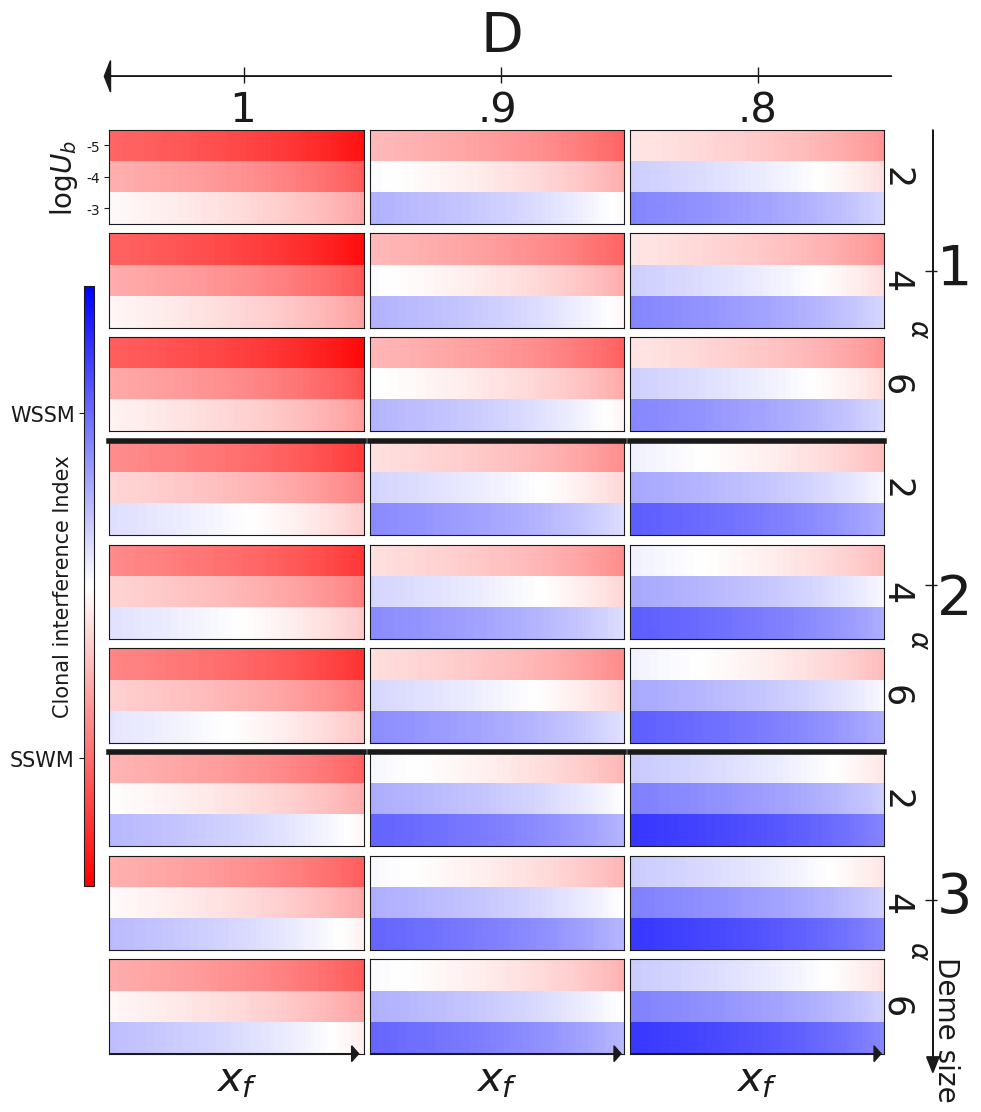

In [3367]:
fig, axs = plt.subplots(9,3,figsize=(10,12))

for ax,l,j,k in zip(axs.flat,9*np.array(range(3)).tolist(),np.array([[3*[i] for i in range(3)]*3 for j in range(3)]).flatten(),np.array([[9*[i] for i in range(3)]]*3).flatten()): 
    #print(l,j,k)
    m = ax.imshow(CIs[k,j,l,:].tolist(),vmin=-4,vmax=4,cmap='bwr_r',aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    
    
cbar_ax = fig.add_axes([0.1, 0.25, 0.01, 0.5])
cbar = fig.colorbar(m, cax=cbar_ax,ticks= [-2.3,2.3])
cbar.set_label('Clonal interference Index', rotation=90,fontsize=15,labelpad=-30)
cbar_ax.set_yticklabels(['SSWM','WSSM'],fontsize=15)
cbar_ax.yaxis.set_ticks_position('left')

    
plt.subplots_adjust(wspace=.02)
plt.subplots_adjust(hspace=.1)



axs[0,0].set_yticks([0,1,2])
axs[0,0].set_yticklabels([-5,-4,-3],fontsize=10)
axs[0,0].set_ylabel(r'$\logU_b$',fontsize=20,rotation=90)


for i in [0,1,2]:
    axs[0+3*i,-1].set_ylabel('2',fontsize=25,labelpad=-180,rotation=270)
    axs[1+3*i,-1].set_ylabel('4',fontsize=25,labelpad=-180,rotation=270)
    axs[2+3*i,-1].set_ylabel('6',fontsize=25,labelpad=-180,rotation=270)

    axs[1+3*i,-2].set_ylabel(r'$\alpha$',fontsize=20,rotation=270,labelpad=50)
    axs[1+3*i,-2].yaxis.set_label_coords(2.1, 0)

axs[0+4*0,-1].set_ylabel('2',fontsize=25,labelpad=-180,rotation=270)

axs[0,0].text(180,-3,'D',fontsize=40)
axs[0,0].set_title(' 1',fontsize=30)
axs[0,1].set_title('.9',fontsize=30)
axs[0,2].set_title('.8',fontsize=30)


ax.text(132,-22,1,fontsize=40)
ax.text(132,-11.5,2,fontsize=40)
ax.text(132,-2,3,fontsize=40)


ax.text(130,.1,'Deme size',fontsize=20,rotation=270)

axs[0,0].arrow(400,-.5,0,29.5,head_width =6,head_length= .5,clip_on=False,color = 'k')
axs[0,0].arrow(396,4,6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(396,14,6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(396,24,6,0,head_width =0,head_length= 0,clip_on=False,color = 'k')


axs[0,0].arrow(380,-2.2,-380,-0,head_width =1,head_length= 3,clip_on=False,color = 'k')
axs[0,0].arrow(65,-2,0,-.5,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(190,-2,0,-.5,head_width =0,head_length= 0,clip_on=False,color = 'k')
axs[0,0].arrow(315,-2,0,-.5,head_width =0,head_length= 0,clip_on=False,color = 'k')


for i in [0,1,2,]:
    axs[-1,i].set_xlabel(r'$x_{f}$',fontsize=30)
    
axs[-1,0].arrow(0,2.5,104,0,head_width=.5,head_length=3,clip_on=False,color = 'k')
axs[-1,1].arrow(0,2.5,105,0,head_width=.5,head_length=3,clip_on=False,color = 'k')
axs[-1,2].arrow(0,2.5,105,0,head_width=.5,head_length=3,clip_on=False,color = 'k')



for i in[0,1,2]:
    for j in range(np.prod(CIs.shape[:2]))[::3][1:]:
        axs[j,i].spines['top'].set_linewidth(4)

plt.savefig('CII_map.pdf')

In [3368]:
np.log(10)

2.302585092994046

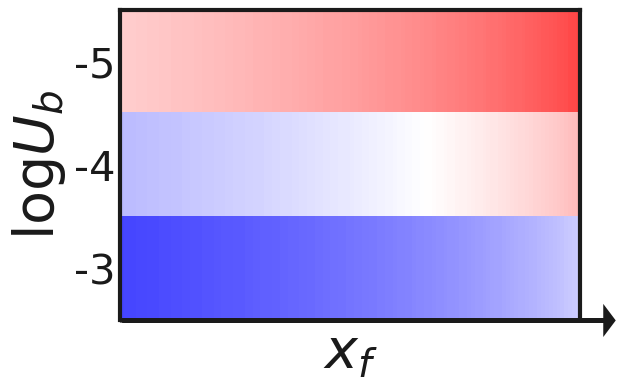

In [3383]:
fig, ax = plt.subplots(figsize=(6,4))


m = ax.imshow(CIs[1,1,1,:].tolist(),vmin=-2.5,vmax=2.5,cmap='bwr_r',aspect='auto')
ax.set_xticks([])




ax.set_yticks([0,1,2,])
ax.set_yticklabels([-5,-4,-3],fontsize=30)
ax.set_ylabel(r'$\logU_b$',fontsize=40)
ax.set_xlabel(r'$x_{f}$',fontsize=40)
ax.arrow(0,2.5,124,0,head_width=.2,head_length=2,clip_on=False,color = 'k',lw=3)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.spines['left'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
plt.subplots_adjust(wspace=.05)
plt.subplots_adjust(hspace=.1)
plt.tight_layout()

plt.savefig('CII_inset.pdf')

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))


m = ax.imshow(CIs[1,0,1,:].tolist(),vmin=-2.5,vmax=2.5,cmap='bwr_r',aspect='auto')
ax.set_xticks([])




ax.set_yticks([0,1,2,])
ax.set_yticklabels([-5,-4,-3],fontsize=30)
ax.set_ylabel(r'$\logU_b$',fontsize=40)
ax.set_xlabel(r'$x_{f}$',fontsize=40)
ax.arrow(0,2.5,124,0,head_width=.2,head_length=2,clip_on=False,color = 'k',lw=3)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.spines['left'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
plt.subplots_adjust(wspace=.05)
plt.subplots_adjust(hspace=.1)
plt.tight_layout()

plt.savefig('CII_inset.pdf')

In [2053]:
K=1*10**4
mu= 10**-3.5
s = .1
rw=.1
alpha=2
D = 1
stand = odeint(standing_wave,[1,-.001],np.linspace(0,R-1,R),args=(D,rw))
p_surf = surf_prob_solve(stand[:,0],rw,rw*a,D, .001)
L_f = np.where((stand[:,0]*K)>1)[0][-1]

In [2074]:
N = K*sum(stand[:,0][:L_f])
(N*mu)/np.log(N*s)

14.607965421882925

In [2055]:
fix_count = p_surf[:,0][:L_f]*stand[:,0][:L_f]*K*mu
f_e = np.where(fix_count==max(fix_count))[0][0]
calc_est_times =1/max(fix_count)

In [2056]:
calc_fix_times = []
for i in range(L_f):
    ft = ((2*L_f-i-f_e)/ ( 2*((D*rm)**.5))-(2*((D*rw)**.5)))
    calc_fix_times.append(ft)

In [2072]:
calc_est_times

49.34778476150921

In [2058]:
(1/s)*np.log(N*s)

108.19367504865201

In [2059]:
1/(N*mu*s)

0.06327153851969367

In [2060]:
N

499794.65240664256

In [2069]:
np.log(calc_fix_times[-1]/calc_est_times)

-0.6267589989180113

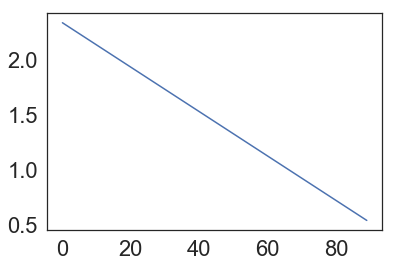

In [2071]:
plt.plot(calc_fix_times/calc_est_times)

Text(0.5,0,'$x_f$')

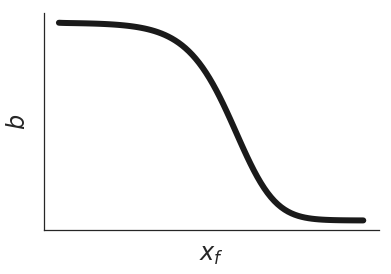

In [2098]:
fig,ax=plt.subplots()
ax.plot(stand[:,0][:L_f],lw=6,color='k')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel('$b$')
ax.set_xlabel('$x_f$')

In [3106]:
R= 5000
t=np.linspace(0,1000,10000)
D=M_A(.0015,.000035,.0028,1)
K=1*10**4
mu= 10**-3.5
s = .1
rw=.1
alpha=2
D = 1
stand = odeint(standing_wave,[1,-.001],np.linspace(0,R-1,R),args=(D,rw))
p_surf = surf_prob_solve(stand[:,0],rw,rw*a,D, .001)
L_f = np.where((stand[:,0]*K)>1)[0][-1]
sim_sde_2 = sde_model_solve_2mut(R=R, R_div=1,
                          c=.0015,c_0=.000035,c_1=.0028,
                          delta= 0,I = 0,
                          K_x = 0, K_s = 0,N = .0, H = 0,rw=rw,
                          a = a,mu = mu,
                          b0 = np.exp( -(np.linspace(0,R-1,R)**2)/(2**2)),
                                 s0 = np.full(R,1),t = t,L_f=L_f, K = K )

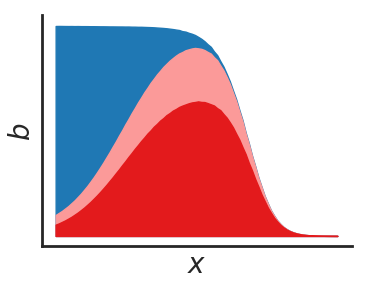

In [3108]:
fig, ax = plt.subplots(figsize=(4,3))

t0 =1800
rng = 200
x = sim_sde_2[t0][0:R]+ sim_sde_2[t0][R:2*R] +sim_sde_2[t0][2*R:3*R]
xm = sim_sde_2[t0][R:2*R] +sim_sde_2[t0][2*R:3*R]
xm2 = sim_sde_2[t0][2*R:3*R]
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel('$b$',fontsize=20)
ax.set_xlabel('$x$',fontsize=20)
ax.set_xticks([])
ax.set_yticks([])

x = x[(x*K)>1]
xm = xm[(xm*K)>1]
xm2 = xm2[(xm2*K)>1]


pal = sns.color_palette("Paired",10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.fill_between(range(L_f),x[-L_f:],color=pal[1])
ax.fill_between(range(L_f),xm[-L_f:],color=pal[4])
ax.fill_between(range(L_f),xm2[-L_f:],color=pal[5])
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.savefig('rng_exp.pdf')

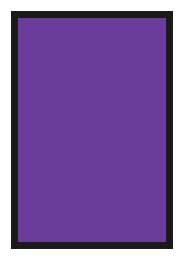

In [2266]:
fig, ax = plt.subplots(figsize=(2,3))




pal = sns.color_palette("Paired",10)

ax.fill_between(range(L_f),1,color=pal[9])
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,L_f-1)
ax.set_ylim(0,1)

for i in ['left','right','bottom','top']:
    ax.spines[i].set_linewidth(5)
plt.savefig('wellmixed.pdf')

In [2155]:
x = sim_sde_2[t0][0:R]+ sim_sde_2[t0][R:2*R] +sim_sde_2[t0][2*R:3*R]

In [2159]:
x = x[(x*K)>1]

In [2164]:
L_f

90

In [2166]:
x

array([9.99825548e-01, 9.99932182e-01, 9.99899936e-01, 9.99983955e-01,
       9.99967944e-01, 1.00000040e+00, 9.99976025e-01, 9.99990595e-01,
       9.99971485e-01, 9.99999442e-01, 9.99999111e-01, 9.99999946e-01,
       1.00000126e+00, 1.00000023e+00, 1.00000804e+00, 1.00000061e+00,
       9.99999749e-01, 1.00000009e+00, 9.99997597e-01, 9.99999933e-01,
       1.00000999e+00, 1.00000084e+00, 1.00001954e+00, 1.00000084e+00,
       9.99999712e-01, 1.00000091e+00, 1.00000068e+00, 1.00000688e+00,
       9.99999867e-01, 9.99999854e-01, 1.00000069e+00, 9.99990722e-01,
       1.00000037e+00, 1.00000050e+00, 9.99996231e-01, 1.00000180e+00,
       9.99999958e-01, 1.00000016e+00, 9.99998497e-01, 1.00000411e+00,
       9.99995363e-01, 1.00000580e+00, 1.00000289e+00, 9.99997109e-01,
       9.99998953e-01, 9.99994988e-01, 9.99999324e-01, 1.00000019e+00,
       9.99992402e-01, 1.00000099e+00, 9.99920051e-01, 9.99998146e-01,
       9.99980665e-01, 1.00000015e+00, 9.99972169e-01, 9.99999897e-01,
      

In [3109]:
R= 500
t=np.linspace(0,1000,10000)
D=M_A(.00272,.000035,.0028,1)
K =1*10**4
a =2.5
mu = 10**-5
rw=.1
stand = odeint(standing_wave,[1,-.001],np.linspace(0,R-1,R),args=(D,rw))
p_surf = surf_prob_solve(stand[:,0],rw,rw*a,D, .001)
L_f = np.where((stand[:,0]*K)>1)[0][-1]
sim_sde_2 = sde_model_solve_2mut(R=R, R_div=1,
                          c=.00272,c_0=.000035,c_1=.0028,
                          delta= 0,I = 0,
                          K_x = 0, K_s = 0,N = .0, H = 0,rw=rw,
                          a = a,mu = mu,
                          b0 = np.exp( -(np.linspace(0,R-1,R)**2)/(2**2)),
                                 s0 = np.full(R,1),t = t,L_f=L_f, K = K )

In [3110]:
K =1*10**4
a =2.5
mu = 10**-5
rw=.1
D= 1 
stand = odeint(standing_wave,[1,-.001],np.linspace(0,R-1,R),args=(D,rw))
p_surf = surf_prob_solve(stand[:,0],rw,rw*a,D, .001)
L_f = np.where((stand[:,0]*K)>1)[0][-1]

In [3111]:
fix_count = p_surf[:,0][:L_f]*stand[:,0][:L_f]*K*mu
f_e = np.where(fix_count==max(fix_count))[0][0]
calc_est_times =1/max(fix_count)

In [3112]:
D= 1 
K =1*10**5
rw=.05
R=500
aas = np.linspace(1.2,4.1,50)
mus = np.linspace(10**-8,10**-2,50)

CIIs_bulk= np.zeros((len(aas),len(mus)))
CIIs_tip = np.zeros((len(aas),len(mus)))
CIIs_mix = np.zeros((len(aas),len(mus)))

c1=0
c2=0
for a in aas:
    c1=0
    for mu in mus:

        stand = odeint(standing_wave,[1,-.000000001],np.linspace(0,R-1,R),args=(D,rw))
        p_surf = surf_prob_solve(stand[:,0],rw,rw*a,D, .0001)
        L_f = np.where((stand[:,0]*K)>1)[0][-1]


        fix_count = p_surf[:,0][:L_f]*stand[:,0][:L_f]*K*mu
        f_e = np.where(fix_count==max(fix_count))[0][0]
        calc_est_times =1/max(fix_count)

        calc_fix_times = []
        for i in range(L_f):
            ft = ((2*L_f-i-f_e)/ ( 2*((D*rm)**.5))-(2*((D*rw)**.5)))
            calc_fix_times.append(ft)


        N = sum(stand[:,0][:L_f])*K
        CII_bulk = np.log(calc_fix_times[0]/calc_est_times)

        CII_tip = np.log(calc_fix_times[-1]/calc_est_times)

        CII_mix = np.log(np.log((a-1)*rw*N)*(N *mu) )

        CIIs_bulk[c1,c2]= CII_bulk
        CIIs_tip[c1,c2]=CII_tip
        CIIs_mix[c1,c2]=CII_mix
        
        c1+=1
    c2+=1



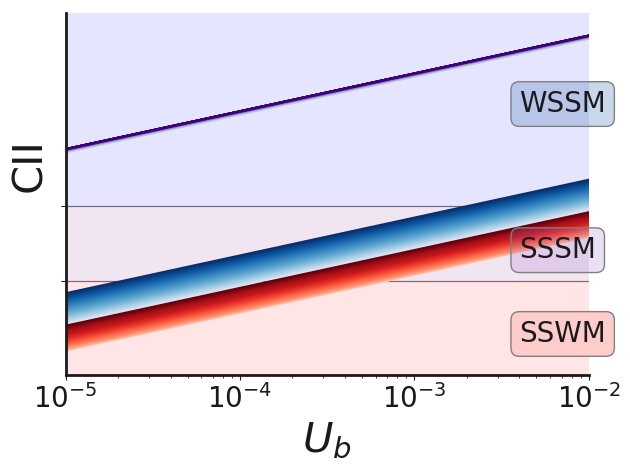

In [3189]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')





fig,ax = plt.subplots()
colors = pl.cm.Purples(np.linspace(.3,1,len(CIIs_mix)))
for i in range(len((CIIs_mix))):
    ax.semilogx(mus,CIIs_mix[:,i],color=colors[i])
    
    
    
colors = pl.cm.Blues(np.linspace(.1,1,25))
for i in range(int(len((CIIs_mix))/2)):
    ax.semilogx(mus,CIIs_bulk[:,i],color=colors[i],alpha=1)
    

#plt.fill_between(range(len(CIIs_mix)),CIIs_bulk[:,-15],CIIs_bulk[:,-1], color=colors[-1],alpha=.3)
    
colors = pl.cm.Reds(np.linspace(.1,1,25))
for i in range(int(len((CIIs_mix))/2)):
    ax.semilogx(mus,CIIs_tip[:,i],color=colors[i],alpha=1)
    
    
ax.set_xlim([10**-6,10**-3])
   
#plt.fill_between(mus,CIIs_tip[:,-15],CIIs_tip[:,-1], color=colors[-1],alpha=.3)
    
ax.set_yticks([-2.3,2.3])
ax.set_yticklabels([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, which='major',color='k',alpha=.5)
ax.set_ylabel('CII',fontsize=30,labelpad=100)
ax.set_xlabel(r'$U_b$',fontsize=30)
ax.text(.0004,-6,'SSWM',fontsize=20,bbox=dict(boxstyle="round",ec='grey',fc=(1., 0.8, 0.8)))
ax.text(.0004,-.9,'SSSM',fontsize=20,bbox=dict(boxstyle="round",ec='grey',fc=(.6, 0.4, 0.8,.2)))
ax.text(.0004,8,'WSSM',fontsize=20,bbox=dict(boxstyle="round",ec='grey',fc=(.3, 0.5, 0.7,.3)))
ax.yaxis.set_label_coords(-.03,.58)
ax.fill_between(mus,-2.3,-14,color='red',alpha=.1)
ax.fill_between(mus,2.3,-2.3,color='purple',alpha=.1)
ax.fill_between(mus,17,2.3,color='blue',alpha=.1)

#ax.set_xticks([-1,50])
ax.set_xticklabels([r'$10^{-6}$',r'$10^{-5}$',r'$10^{-4}$',r'$10^{-3}$',r'$10^{-2}$'],fontsize=20)


ax.set_ylim([-8,14])

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)







#img2 = plt.imshow([aas], cmap="Reds",vmin=1,vmax=4.5);
#img2.set_visible(False)
#cbar2 = plt.colorbar(img2,orientation="vertical",ticks=[],ticklocation='right');#
#cbar.ax.get_yaxis().labelpad = 
#cbar1.ax.set_ylabel(r'', rotation=270,fontsize=30)

#img = plt.imshow([aas], cmap="Purples",vmin=1,vmax=4.5);
#plt.axis('off')
#plt.grid(False)
#img.set_visible(False)

#cbar = plt.colorbar(img,orientation="vertical",ticks=[1,4],);
#cbar.ax.yaxis.set_ticks_position('left')
#cbar.ax.set_ylabel(r'$\alpha$', rotation=90,fontsize=40,labelpad=-65)
#cbar.ax.tick_params(labelsize=30) 


plt.tight_layout()
plt.savefig('mixvfish.pdf')

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


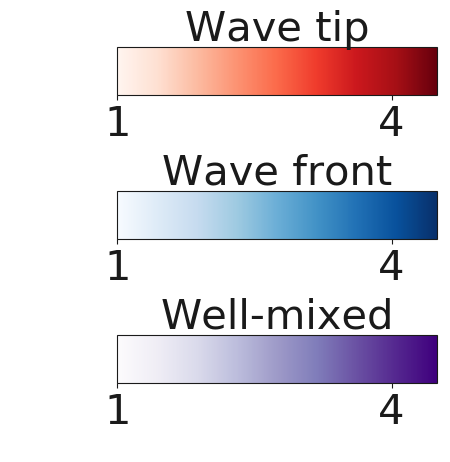

In [3396]:


fig=plt.figure()

ax = fig.add_axes([0, 0, 0.01, 0.01]) 
ax.grid(False)
ax.axis('off')
img = ax.imshow([aas], cmap="Purples",vmin=1,vmax=4.5);
img.set_visible(False)
c_ax1 = fig.add_axes([0.1, 0.1, 0.5, 0.1]) 
cbar = plt.colorbar(img,orientation="horizontal",cax=c_ax1,ticks=[1,4]);
#cbar.ax.yaxis.set_ticks_position('left')
c_ax1.set_ylabel(r'Well-mixed', rotation=0,fontsize=30)
c_ax1.yaxis.set_label_coords(.5, .95)
c_ax1.tick_params(labelsize=30) 



ax1 = fig.add_axes([0, 0, 0.01, 0.01]) 
ax1.grid(False)
ax1.axis('off')
img1 = ax1.imshow([aas], cmap="Blues",vmin=1,vmax=4.5);
img1.set_visible(False)
c_ax2 = fig.add_axes([0.1, 0.4, 0.5, 0.1]) 
cbar2 = plt.colorbar(img1,orientation="horizontal",cax=c_ax2,ticks=[1,4]);
cbar2.ax.yaxis.set_ticks_position('left')
c_ax2.set_ylabel(r'Wave front', rotation=0,fontsize=30)
c_ax2.yaxis.set_label_coords(.5, .95)
c_ax2.tick_params(labelsize=30) 


ax2 = fig.add_axes([0, 0, 0.01, 0.01]) 
ax2.grid(False)
ax2.axis('off')
img2 = ax2.imshow([aas], cmap="Reds",vmin=1,vmax=4.5);
img2.set_visible(False)
c_ax3 = fig.add_axes([0.1, 0.7, 0.5, 0.1]) 
cbar3 = plt.colorbar(img2,orientation="horizontal",cax=c_ax3,ticks=[1,4]);
cbar3.ax.yaxis.set_ticks_position('left')
c_ax3.set_ylabel(r'Wave tip', rotation=0,fontsize=30)
c_ax3.yaxis.set_label_coords(.5, .95)
c_ax3.tick_params(labelsize=30) 





#img1 = plt.imshow([aas][0:2], cmap="Blues",vmin=1,vmax=4.5);
#img1.set_visible(False)
#cbar1 = plt.colorbar(img1,orientation="vertical",aspect=3,ticks=[]);#
#cbar.ax.get_yaxis().labelpad = 
#cbar1.ax.set_ylabel(r'', rotation=270,fontsize=30)

#img2 = plt.imshow([aas], cmap="Reds",vmin=1,vmax=4.5);
#img2.set_visible(False)
#cbar2 = plt.colorbar(img2,orientation="vertical",aspect=3,ticks=[],ticklocation='right');#
#cbar.ax.get_yaxis().labelpad = 
#cbar1.ax.set_ylabel(r'', rotation=270,fontsize=30)


#img = plt.imshow([aas], cmap="Purples",vmin=1,vmax=4.5);
#plt.axis('off')
#plt.grid(False)
#img.set_visible(False)

#cbar = plt.colorbar(img,orientation="vertical",aspect=3,ticks=[1,4],);
#cbar.ax.yaxis.set_ticks_position('left')
#cbar.ax.set_ylabel(r'$\alpha$', rotation=90,fontsize=40,labelpad=5)
#cbar.ax.tick_params(labelsize=30) 


#img.set_visible(False)
#img1.set_visible(False)
#img2.set_visible(False)
#plt.tight_layout()
plt.savefig('bars.pdf')


In [2487]:
np.linspace(10**-6,10**-3-10**-4,30)

array([1.00e-06, 3.20e-05, 6.30e-05, 9.40e-05, 1.25e-04, 1.56e-04,
       1.87e-04, 2.18e-04, 2.49e-04, 2.80e-04, 3.11e-04, 3.42e-04,
       3.73e-04, 4.04e-04, 4.35e-04, 4.66e-04, 4.97e-04, 5.28e-04,
       5.59e-04, 5.90e-04, 6.21e-04, 6.52e-04, 6.83e-04, 7.14e-04,
       7.45e-04, 7.76e-04, 8.07e-04, 8.38e-04, 8.69e-04, 9.00e-04])

In [2639]:
len(CIIs_mix)/2

15.0

In [2631]:

for i in range(int(len((CIIs_mix))/2)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
